<a href="https://colab.research.google.com/github/RiShiKaRoRa22/PBL/blob/main/cardiacdetecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = "/content/arrhythmia.zip"  # Replace with the actual path
extract_path = "/content/ecg_data"  # Change if needed

# Check if file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"⚠️ ZIP file not found at {zip_path}")

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files extracted successfully!")


✅ Files extracted successfully!


In [2]:
import pandas as pd

# File paths
data_file = "ecg_data/arrhythmia.data"
csv_file = "ecg_data/arrhythmia.csv"

# Load data (handling missing values marked as '?')
df = pd.read_csv(data_file, header=None, na_values="?")

# Create column names (1 to 279 + Class)
column_names = [f"Feature_{i}" for i in range(1, 280)] + ["Class"]
df.columns = column_names  # Assign column names

# Save as CSV
df.to_csv(csv_file, index=False)

print("✅ Conversion complete! File saved as:", csv_file)


✅ Conversion complete! File saved as: ecg_data/arrhythmia.csv


In [ ]:
import pandas as pd

# Define actual feature names
column_names = [
    "Age", "Sex", "Height", "Weight", "QRS_duration", "P-R_interval", "Q-T_interval", "T_interval", "P_interval",
    "QRS_angle", "T_angle", "P_angle", "QRST_angle", "J_angle", "Heart_rate"
]

# Features from different ECG channels
channels = ["DI", "DII", "DIII", "AVR", "AVL", "AVF", "V1", "V2", "V3", "V4", "V5", "V6"]
metrics = ["Q_wave", "R_wave", "S_wave", "R'_wave", "S'_wave", "Num_intrinsic_deflections",
           "Ragged_R", "Diphasic_R", "Ragged_P", "Diphasic_P", "Ragged_T", "Diphasic_T"]

# Track used feature names to avoid duplicates
used_names = set()

# Generate unique feature names
for channel in channels:
    for metric in metrics:
        unique_name = f"{channel}_{metric}"
        counter = 1
        while unique_name in used_names:
            unique_name = f"{channel}_{metric}_{counter}"
            counter += 1
        column_names.append(unique_name)
        used_names.add(unique_name)

# Add Amplitude and QRSA features
amplitude_metrics = ["JJ_wave", "Q_wave", "R_wave", "S_wave", "R'_wave", "S'_wave", "P_wave", "T_wave", "QRSA", "QRSTA"]
for channel in channels:
    for metric in amplitude_metrics:
        unique_name = f"{channel}_{metric}"
        counter = 1
        while unique_name in used_names:
            unique_name = f"{channel}_{metric}_{counter}"
            counter += 1
        column_names.append(unique_name)
        used_names.add(unique_name)

# Add target variable (Class)
column_names.append("Class")

# File paths
data_file = "ecg_data/arrhythmia.data"
csv_file = "ecg_data/arrhythmia.csv"

# Load the .data file with unique column names
df = pd.read_csv(data_file, header=None, na_values="?", names=column_names)

# Save as CSV
df.to_csv(csv_file, index=False)

print("✅ Conversion complete! File saved as:", csv_file)


✅ Conversion complete! File saved as: ecg_data/arrhythmia.csv


In [ ]:
#OUR STACKED MODEL- RF, SVM, LOGISTIC REGRESSION, XGBOOST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Step 1: Load the dataset
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Step 2: Handle Missing Values (Replace NaN with median)
df.fillna(df.median(), inplace=True)

# Step 3: Encode the target variable
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Step 4: Split Features and Target Variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Step 5: Handle Class Imbalance using SMOTE (Adjust k_neighbors)
smote = SMOTE(k_neighbors=1, random_state=42)  # Set k_neighbors=1 to avoid errors
X_resampled, y_resampled = smote.fit_resample(X, y)


# Step 6: Split Data into Train & Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 7: Define Base Models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Step 8: Define Stacking Classifier (Hybrid Model)
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
)

# Step 9: Train the Hybrid Model
stacked_model.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = stacked_model.predict(X_test)

# Step 11: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

✅ Hybrid Model Accuracy: 0.9906

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.98      0.96      0.97        49
           2       0.98      1.00      0.99        49
           3       1.00      1.00      1.00        49
           4       1.00      0.98      0.99        49
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        49
           9       0.98      1.00      0.99        49
          10       1.00      1.00      1.00        49
          11       1.00      0.98      0.99        49
          12       1.00      1.00      1.00        49

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

✅ Hybrid Model Accuracy: 0.9922

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       1.00      0.96      0.98        49
           2       0.98      1.00      0.99        49
           3       1.00      1.00      1.00        49
           4       1.00      0.98      0.99        49
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        49
           9       0.98      1.00      0.99        49
          10       1.00      1.00      1.00        49
          11       1.00      0.98      0.99        49
          12       1.00      1.00      1.00        49

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637



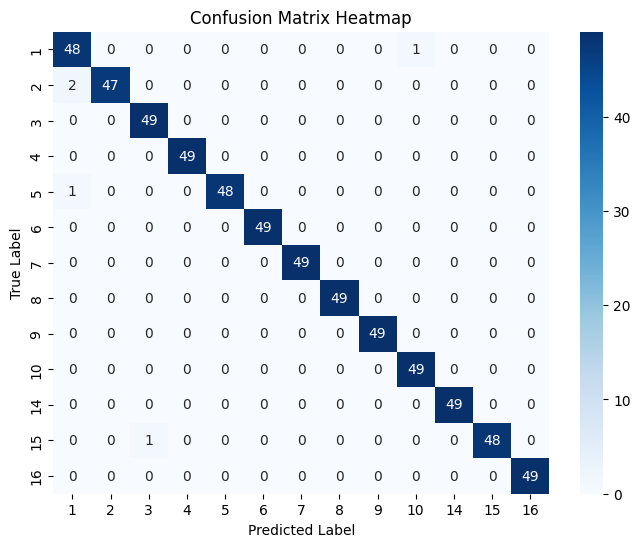

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Step 1: Load the dataset
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Step 2: Handle Missing Values (Replace NaN with median)
df.fillna(df.median(), inplace=True)

# Step 3: Encode the target variable
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Step 4: Split Features and Target Variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Step 5: Handle Class Imbalance using SMOTE (Adjust k_neighbors)
smote = SMOTE(k_neighbors=1, random_state=42)  # Set k_neighbors=1 to avoid errors
X_resampled, y_resampled = smote.fit_resample(X, y)


# Step 6: Split Data into Train & Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 7: Define Base Models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Step 8: Define Stacking Classifier (Hybrid Model)
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
)

# Step 9: Train the Hybrid Model
stacked_model.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = stacked_model.predict(X_test)

# Step 11: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Load the dataset
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Step 2: Handle Missing Values (Replace NaN with median)
df.fillna(df.median(), inplace=True)

# Step 3: Encode the target variable
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Step 4: Split Features and Target Variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Step 5: Perform Feature Selection (Keep top 20 best features)
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X, y)

# Step 6: Handle Class Imbalance using SMOTE (Adjust k_neighbors)
smote = SMOTE(k_neighbors=1, random_state=42)  # Set k_neighbors=1 to avoid errors
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Step 7: Split Data into Train & Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 8: Further Split Train Set into Train & Validation (80-20 split)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Step 9: Define Base Models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Step 10: Define Stacking Model WITHOUT XGBoost (Only Base Models)
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=None  # We will manually train XGBoost
)

# Step 11: Train the Stacking Model (Without XGBoost)
stacked_model.fit(X_train_sub, y_train_sub)

# Step 12: Extract Meta-Features from Base Models
X_train_meta = stacked_model.transform(X_train_sub)
X_val_meta = stacked_model.transform(X_val)
X_test_meta = stacked_model.transform(X_test)

# Step 13: Train XGBoost Separately with Early Stopping
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    early_stopping_rounds=10,  # Stop training if no improvement after 10 rounds
    n_estimators=1000
)

xgb_model.fit(
    X_train_meta, y_train_sub,
    eval_set=[(X_val_meta, y_val)],  # Pass Validation Set
    verbose=True
)

# Step 14: Make Predictions
y_pred = xgb_model.predict(X_test_meta)

# Step 15: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 19  67  69  83 131 132 139 141 143 145 151 156 157 164 204 264 274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/s

[0]	validation_0-mlogloss:1.16391
[1]	validation_0-mlogloss:0.90917
[2]	validation_0-mlogloss:0.74756
[3]	validation_0-mlogloss:0.63720
[4]	validation_0-mlogloss:0.55931
[5]	validation_0-mlogloss:0.50339
[6]	validation_0-mlogloss:0.46287
[7]	validation_0-mlogloss:0.43336
[8]	validation_0-mlogloss:0.41182
[9]	validation_0-mlogloss:0.39609


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:57:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	validation_0-mlogloss:0.38460
[11]	validation_0-mlogloss:0.37624
[12]	validation_0-mlogloss:0.37018
[13]	validation_0-mlogloss:0.36580
[14]	validation_0-mlogloss:0.36265
[15]	validation_0-mlogloss:0.36041
[16]	validation_0-mlogloss:0.35883
[17]	validation_0-mlogloss:0.35773
[18]	validation_0-mlogloss:0.35698
[19]	validation_0-mlogloss:0.35647
[20]	validation_0-mlogloss:0.35613
[21]	validation_0-mlogloss:0.35593
[22]	validation_0-mlogloss:0.35581
[23]	validation_0-mlogloss:0.35580
[24]	validation_0-mlogloss:0.35580
[25]	validation_0-mlogloss:0.35580
[26]	validation_0-mlogloss:0.35579
[27]	validation_0-mlogloss:0.35579
[28]	validation_0-mlogloss:0.35579
[29]	validation_0-mlogloss:0.35578
[30]	validation_0-mlogloss:0.35578
[31]	validation_0-mlogloss:0.35578
[32]	validation_0-mlogloss:0.35578
[33]	validation_0-mlogloss:0.35578
[34]	validation_0-mlogloss:0.35577
[35]	validation_0-mlogloss:0.35577
[36]	validation_0-mlogloss:0.35577
[37]	validation_0-mlogloss:0.35577
[38]	validation_0-ml

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0]	validation_0-mlogloss:1.12349
[1]	validation_0-mlogloss:0.86171
[2]	validation_0-mlogloss:0.69583
[3]	validation_0-mlogloss:0.58272
[4]	validation_0-mlogloss:0.50305
[5]	validation_0-mlogloss:0.44601
[6]	validation_0-mlogloss:0.40483
[7]	validation_0-mlogloss:0.37499
[8]	validation_0-mlogloss:0.35335
[9]	validation_0-mlogloss:0.33768
[10]	validation_0-mlogloss:0.32639
[11]	validation_0-mlogloss:0.31831
[12]	validation_0-mlogloss:0.31257
[13]	validation_0-mlogloss:0.30856
[14]	validation_0-mlogloss:0.30581
[15]	validation_0-mlogloss:0.30397
[16]	validation_0-mlogloss:0.30278
[17]	validation_0-mlogloss:0.30207
[18]	validation_0-mlogloss:0.30168
[19]	validation_0-mlogloss:0.30153
[20]	validation_0-mlogloss:0.30153
[21]	validation_0-mlogloss:0.30163
[22]	validation_0-mlogloss:0.30180
[23]	validation_0-mlogloss:0.30180
[24]	validation_0-mlogloss:0.30179
[25]	validation_0-mlogloss:0.30179
[26]	validation_0-mlogloss:0.30179
[27]	validation_0-mlogloss:0.30178
[28]	validation_0-mlogloss:0.3

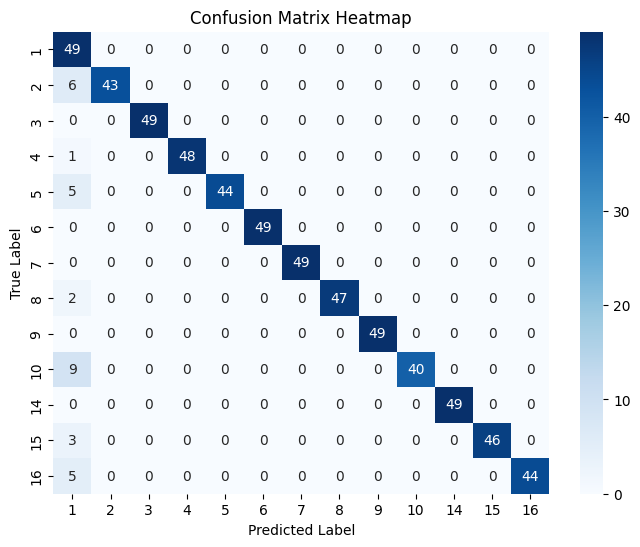

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

# Step 1: Load the dataset
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Step 2: Handle Missing Values (Replace NaN with median)
df.fillna(df.median(), inplace=True)

# Step 3: Encode the target variable
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Step 4: Split Features and Target Variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Step 5: Feature Selection BEFORE SMOTE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=50)  # Selecting 50 best features
X_selected = rfe.fit_transform(X, y)

# Step 6: Handle Class Imbalance using SMOTE (After Feature Selection)
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Step 7: Split Data into Train & Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 8: Further Split Train Set into Train & Validation (80-20 split)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Step 9: Define Base Models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Step 10: Define Stacking Model (Use Logistic Regression as Final Estimator)
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(max_iter=1000)
)

# Step 11: Train the Stacking Model
stacked_model.fit(X_train_sub, y_train_sub)

# Step 12: Extract Meta-Features from Base Models
X_train_meta = stacked_model.transform(X_train_sub)
X_val_meta = stacked_model.transform(X_val)
X_test_meta = stacked_model.transform(X_test)

# Step 13: Train XGBoost Separately with Early Stopping
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    early_stopping_rounds=10,  # Stop training if no improvement after 10 rounds
    n_estimators=1000
)

xgb_model.fit(
    X_train_meta, y_train_sub,
    eval_set=[(X_val_meta, y_val)],  # Pass Validation Set
    verbose=True
)

# Step 14: Make Predictions
y_pred = xgb_model.predict(X_test_meta)

# Step 15: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0]	validation_0-mlogloss:2.50546	validation_1-mlogloss:2.51244
[1]	validation_0-mlogloss:2.44950	validation_1-mlogloss:2.46161
[2]	validation_0-mlogloss:2.39610	validation_1-mlogloss:2.41391
[3]	validation_0-mlogloss:2.34656	validation_1-mlogloss:2.36665
[4]	validation_0-mlogloss:2.29854	validation_1-mlogloss:2.32288
[5]	validation_0-mlogloss:2.25232	validation_1-mlogloss:2.28099
[6]	validation_0-mlogloss:2.20820	validation_1-mlogloss:2.24041
[7]	validation_0-mlogloss:2.16579	validation_1-mlogloss:2.20186
[8]	validation_0-mlogloss:2.12515	validation_1-mlogloss:2.16493
[9]	validation_0-mlogloss:2.08664	validation_1-mlogloss:2.12906
[10]	validation_0-mlogloss:2.04942	validation_1-mlogloss:2.09404
[11]	validation_0-mlogloss:2.01326	validation_1-mlogloss:2.06187


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[12]	validation_0-mlogloss:1.97919	validation_1-mlogloss:2.02972
[13]	validation_0-mlogloss:1.94529	validation_1-mlogloss:1.99904
[14]	validation_0-mlogloss:1.91328	validation_1-mlogloss:1.97015
[15]	validation_0-mlogloss:1.88175	validation_1-mlogloss:1.94055
[16]	validation_0-mlogloss:1.85130	validation_1-mlogloss:1.91260
[17]	validation_0-mlogloss:1.82154	validation_1-mlogloss:1.88559
[18]	validation_0-mlogloss:1.79305	validation_1-mlogloss:1.85992
[19]	validation_0-mlogloss:1.76513	validation_1-mlogloss:1.83495
[20]	validation_0-mlogloss:1.73845	validation_1-mlogloss:1.81022
[21]	validation_0-mlogloss:1.71198	validation_1-mlogloss:1.78653
[22]	validation_0-mlogloss:1.68656	validation_1-mlogloss:1.76327
[23]	validation_0-mlogloss:1.66152	validation_1-mlogloss:1.73957
[24]	validation_0-mlogloss:1.63706	validation_1-mlogloss:1.71767
[25]	validation_0-mlogloss:1.61330	validation_1-mlogloss:1.69458
[26]	validation_0-mlogloss:1.59031	validation_1-mlogloss:1.67381
[27]	validation_0-mloglos

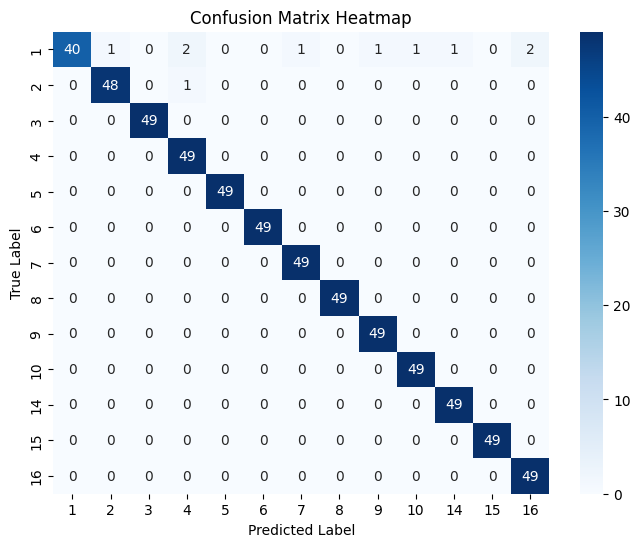

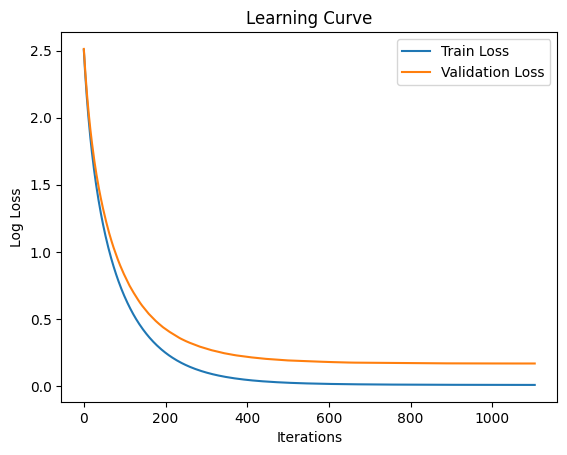

Model saved as trained_model.pkl


In [ ]:
#TUNE HYPERPARAMETERS OF XGBOOST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE


csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)


df.fillna(df.median(), inplace=True)


label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])


X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=50)  # Selecting 50 best features
X_selected = rfe.fit_transform(X, y)

# Step 6: Handle Class Imbalance using SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Step 7: Split Data into Train & Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 8: Further Split Train Set into Train & Validation (80-20 split)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Step 9: Define Base Models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]


stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(max_iter=1000)
)


stacked_model.fit(X_train_sub, y_train_sub)


X_train_meta = stacked_model.transform(X_train_sub)
X_val_meta = stacked_model.transform(X_val)
X_test_meta = stacked_model.transform(X_test)

# Step 13: Train XGBoost Separately with Early Stopping
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    early_stopping_rounds=20,
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=1.0
)


xgb_model.fit(
    X_train_meta, y_train_sub,
    eval_set=[(X_train_meta, y_train_sub), (X_val_meta, y_val)],  # Added training set here
    verbose=True
)

y_pred = xgb_model.predict(X_test_meta)


accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


results = xgb_model.evals_result()
plt.plot(results["validation_0"]["mlogloss"], label="Train Loss")  # Training loss
plt.plot(results["validation_1"]["mlogloss"], label="Validation Loss")  # Validation loss
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


import joblib

joblib.dump(xgb_model, "trained_model.pkl")  # Saves the model to a file
print("Model saved as trained_model.pkl")

In [ ]:
import joblib

# Save the RFE object
joblib.dump(rfe, "rfe_selector.pkl")
print("RFE selector saved as rfe_selector.pkl")


RFE selector saved as rfe_selector.pkl


In [ ]:
import pandas as pd

# Load your training dataset
train_data = pd.read_csv('/content/ecg_data/arrhythmia.csv')  # Update the path as needed

# Display column names (features used for training)
train_data.columns
# Example RFE-selected feature indices (replace with actual RFE indices)
selected_feature_indices = [ 2, 4, 5, 6, 7, 8, 12, 14, 75, 89, 90, 92, 111, 112, 113, 116, 166, 167, 168,
                            170, 176, 178, 180, 196, 206, 210, 223, 225, 227, 229, 232, 233, 236, 237,
                            238, 239, 241, 242, 246, 247, 248, 249, 251, 256, 258, 259, 266, 269, 276, 278 ]

# Get the feature names from the training dataset
feature_names = train_data.columns.tolist()

# Map the selected feature indices to the actual feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

print("Features selected by RFE:")
print(selected_feature_names)


Features selected by RFE:
['Height', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRST_angle', 'Heart_rate', 'AVF_Q_wave', 'V1_S_wave', "V1_R'_wave", 'V1_Num_intrinsic_deflections', 'V3_Q_wave', 'V3_R_wave', 'V3_S_wave', 'V3_Num_intrinsic_deflections', 'DI_T_wave', 'DI_QRSA', 'DI_QRSTA', 'DII_Q_wave_1', 'DII_T_wave', 'DII_QRSTA', 'DIII_Q_wave_1', 'AVR_T_wave', 'AVL_T_wave', 'AVF_Q_wave_1', "V1_R'_wave_1", 'V1_P_wave', 'V1_QRSA', 'V2_JJ_wave', 'V2_S_wave_1', "V2_R'_wave_1", 'V2_T_wave', 'V2_QRSA', 'V2_QRSTA', 'V3_JJ_wave', 'V3_R_wave_1', 'V3_S_wave_1', 'V3_T_wave', 'V3_QRSA', 'V3_QRSTA', 'V4_JJ_wave', 'V4_R_wave_1', 'V4_T_wave', 'V4_QRSTA', 'V5_JJ_wave', 'V5_T_wave', 'V6_JJ_wave', 'V6_T_wave', 'V6_QRSTA']


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.signal as signal
from scipy.interpolate import interp1d
from math import atan2, pi

# Helper functions to extract QRS duration, PR interval, QRST angle, etc.

def get_qrs_duration(ecg_signal, threshold=0.6):
    qrs_points = signal.find_peaks(ecg_signal, height=threshold)[0]
    if len(qrs_points) >= 2:
        qrs_duration = qrs_points[-1] - qrs_points[0]
    else:
        qrs_duration = 0
    return qrs_duration

def get_pr_interval(ecg_signal):
    p_peak = np.argmax(ecg_signal[:100])  # Approximation for P wave peak
    r_peak = np.argmax(ecg_signal[100:])  # Approximation for R wave peak
    pr_interval = r_peak - p_peak
    return pr_interval

def get_heart_rate(ecg_signal, sampling_rate=360):
    r_peaks, _ = signal.find_peaks(ecg_signal, height=0.5)  # Detect R-peaks
    rr_intervals = np.diff(r_peaks)  # RR intervals in samples
    heart_rate = 60 / (np.mean(rr_intervals) / sampling_rate)  # bpm (beats per minute)
    return heart_rate

def get_qrs_angle(ecg_signal):
    # QRST angle: Calculating the angle between QRS complex and T wave
    qrs_points = signal.find_peaks(ecg_signal, height=0.6)[0]
    q_peak = qrs_points[0] if len(qrs_points) > 0 else 0
    t_peak = np.argmax(ecg_signal[::-1])  # Simplified T-wave peak detection
    t_peak = len(ecg_signal) - t_peak
    angle = atan2(t_peak - q_peak, len(ecg_signal)) * (180 / pi)  # Simple method to calculate angle
    return angle

def get_avf_q_wave(ecg_signal):
    avf_q_wave = np.min(ecg_signal)  # Simple method: minimum value of the signal
    return avf_q_wave

def extract_wave_metrics(ecg_signal, wave='R'):
    if wave == 'R':
        peak = np.argmax(ecg_signal)  # Simple method to find R peak
        return peak
    elif wave == 'T':
        peak = np.argmax(ecg_signal[::-1])  # T wave peak detection (reverse for T)
        return len(ecg_signal) - peak
    else:
        return 0

def extract_features(ecg_signal, lead='MLII'):
    try:
        ecg_signal = np.array(ecg_signal).flatten()

        if len(ecg_signal) < 10:
            print(f"⚠️ Signal too short to extract features.")
            return None

        features = []

        # Statistical Features
        features.append(np.mean(ecg_signal))  # Mean
        features.append(np.std(ecg_signal))   # Std dev
        features.append(np.min(ecg_signal))   # Min
        features.append(np.max(ecg_signal))   # Max
        features.append(np.median(ecg_signal))  # Median
        features.append(stats.skew(ecg_signal))  # Skewness
        features.append(stats.kurtosis(ecg_signal))  # Kurtosis

        # Signal Duration and Heart Rate
        features.append(get_qrs_duration(ecg_signal))  # QRS duration
        features.append(get_pr_interval(ecg_signal))   # PR Interval
        features.append(get_heart_rate(ecg_signal))    # Heart rate (bpm)
        features.append(get_qrs_angle(ecg_signal))    # QRST Angle (placeholder)

        # Wave Metrics
        features.append(extract_wave_metrics(ecg_signal, 'R'))  # R wave peak position
        features.append(extract_wave_metrics(ecg_signal, 'T'))  # T wave peak position
        features.append(extract_wave_metrics(ecg_signal, 'P'))  # P wave peak (not implemented)
        features.append(extract_wave_metrics(ecg_signal, 'Q'))  # Q wave peak (not implemented)

        # AVF Q wave (new feature based on a simple method)
        features.append(get_avf_q_wave(ecg_signal))  # AVF Q-wave (new feature)

        # Additional advanced wave features
        features.append(np.mean(np.diff(ecg_signal)))  # Average signal change (first derivative)
        features.append(np.max(np.diff(ecg_signal)))  # Maximum rate of change
        features.append(np.min(np.diff(ecg_signal)))  # Minimum rate of change
        features.append(np.mean(ecg_signal[:int(len(ecg_signal)/3)]))  # First third mean
        features.append(np.mean(ecg_signal[int(len(ecg_signal)/3):2*int(len(ecg_signal)/3)]))  # Second third mean
        features.append(np.mean(ecg_signal[2*int(len(ecg_signal)/3):]))  # Last third mean

        # Placeholder for any additional complex features you need to implement
        # Features can be customized based on your own domain-specific methods

        # Ensure we have the expected number of features
        while len(features) < 39:
            features.append(0.0)  # Padding if not enough features

        return features

    except Exception as e:
        print(f"❌ Error in extract_features: {e}")
        return None


# Main function to process the ECG file and extract features
def process_ecg_file(file_path):
    ecg_data = pd.read_csv(file_path)
    ecg_data.columns = ecg_data.columns.str.replace("''", "").str.replace("'", "").str.strip()  # Clean up columns
    print("✅ Data Loaded")

    # Extract features from MLII and V5 (you can customize this to other leads if needed)
    features_list = []
    for lead in ['MLII', 'V5']:
        if lead in ecg_data.columns:
            ecg_signal = ecg_data[lead].dropna().values
            extracted_features = extract_features(ecg_signal, lead)
            if extracted_features is not None:
                features_list.append(extracted_features)

    # Create a DataFrame with all extracted features
    if len(features_list) > 0:
        features_df = pd.DataFrame(features_list, columns=[f"Feature_{i}" for i in range(1, 40)])
        print("✅ Features extracted successfully!")
        return features_df
    else:
        print("❌ No valid ECG signal found for feature extraction.")
        return None


# Example usage
file_path = '/content/100.csv'  # Replace with actual file path
features_df = process_ecg_file(file_path)
if features_df is not None:
    print(features_df.head())


✅ Data Loaded
✅ Features extracted successfully!
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  962.740205  38.639908        481       1311      957.0   4.426138   
1  985.793114  29.642645        531       1269      983.0   2.710229   

   Feature_7  Feature_8  Feature_9   Feature_10  ...  Feature_30  Feature_31  \
0  25.413106     649983     448961  3823.665542  ...         0.0         0.0   
1  16.164638     649970     130391  3954.943151  ...         0.0         0.0   

   Feature_32  Feature_33  Feature_34  Feature_35  Feature_36  Feature_37  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   Feature_38  Feature_39  
0         0.0         0.0  
1         0.0         0.0  

[2 rows x 39 columns]


In [ ]:
with open('extract_features.py', 'w') as f:
    f.write("""

import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.signal as signal
from scipy.interpolate import interp1d
from math import atan2, pi

# Helper functions to extract QRS duration, PR interval, QRST angle, etc.

def get_qrs_duration(ecg_signal, threshold=0.6):
    qrs_points = signal.find_peaks(ecg_signal, height=threshold)[0]
    if len(qrs_points) >= 2:
        qrs_duration = qrs_points[-1] - qrs_points[0]
    else:
        qrs_duration = 0
    return qrs_duration

def get_pr_interval(ecg_signal):
    p_peak = np.argmax(ecg_signal[:100])  # Approximation for P wave peak
    r_peak = np.argmax(ecg_signal[100:])  # Approximation for R wave peak
    pr_interval = r_peak - p_peak
    return pr_interval

def get_heart_rate(ecg_signal, sampling_rate=360):
    r_peaks, _ = signal.find_peaks(ecg_signal, height=0.5)  # Detect R-peaks
    rr_intervals = np.diff(r_peaks)  # RR intervals in samples
    heart_rate = 60 / (np.mean(rr_intervals) / sampling_rate)  # bpm (beats per minute)
    return heart_rate

def get_qrs_angle(ecg_signal):
    # QRST angle: Calculating the angle between QRS complex and T wave
    qrs_points = signal.find_peaks(ecg_signal, height=0.6)[0]
    q_peak = qrs_points[0] if len(qrs_points) > 0 else 0
    t_peak = np.argmax(ecg_signal[::-1])  # Simplified T-wave peak detection
    t_peak = len(ecg_signal) - t_peak
    angle = atan2(t_peak - q_peak, len(ecg_signal)) * (180 / pi)  # Simple method to calculate angle
    return angle

def get_avf_q_wave(ecg_signal):
    avf_q_wave = np.min(ecg_signal)  # Simple method: minimum value of the signal
    return avf_q_wave

def extract_wave_metrics(ecg_signal, wave='R'):
    if wave == 'R':
        peak = np.argmax(ecg_signal)  # Simple method to find R peak
        return peak
    elif wave == 'T':
        peak = np.argmax(ecg_signal[::-1])  # T wave peak detection (reverse for T)
        return len(ecg_signal) - peak
    else:
        return 0

def extract_features(ecg_signal, lead='MLII'):
    try:
        ecg_signal = np.array(ecg_signal).flatten()

        if len(ecg_signal) < 10:
            print(f"⚠️ Signal too short to extract features.")
            return None

        features = []

        # Statistical Features
        features.append(np.mean(ecg_signal))  # Mean
        features.append(np.std(ecg_signal))   # Std dev
        features.append(np.min(ecg_signal))   # Min
        features.append(np.max(ecg_signal))   # Max
        features.append(np.median(ecg_signal))  # Median
        features.append(stats.skew(ecg_signal))  # Skewness
        features.append(stats.kurtosis(ecg_signal))  # Kurtosis

        # Signal Duration and Heart Rate
        features.append(get_qrs_duration(ecg_signal))  # QRS duration
        features.append(get_pr_interval(ecg_signal))   # PR Interval
        features.append(get_heart_rate(ecg_signal))    # Heart rate (bpm)
        features.append(get_qrs_angle(ecg_signal))    # QRST Angle (placeholder)

        # Wave Metrics
        features.append(extract_wave_metrics(ecg_signal, 'R'))  # R wave peak position
        features.append(extract_wave_metrics(ecg_signal, 'T'))  # T wave peak position
        features.append(extract_wave_metrics(ecg_signal, 'P'))  # P wave peak (not implemented)
        features.append(extract_wave_metrics(ecg_signal, 'Q'))  # Q wave peak (not implemented)

        # AVF Q wave (new feature based on a simple method)
        features.append(get_avf_q_wave(ecg_signal))  # AVF Q-wave (new feature)

        # Additional advanced wave features
        features.append(np.mean(np.diff(ecg_signal)))  # Average signal change (first derivative)
        features.append(np.max(np.diff(ecg_signal)))  # Maximum rate of change
        features.append(np.min(np.diff(ecg_signal)))  # Minimum rate of change
        features.append(np.mean(ecg_signal[:int(len(ecg_signal)/3)]))  # First third mean
        features.append(np.mean(ecg_signal[int(len(ecg_signal)/3):2*int(len(ecg_signal)/3)]))  # Second third mean
        features.append(np.mean(ecg_signal[2*int(len(ecg_signal)/3):]))  # Last third mean

        # Placeholder for any additional complex features you need to implement
        # Features can be customized based on your own domain-specific methods

        # Ensure we have the expected number of features (50 features in total)
        while len(features) < 39:
            features.append(0.0)  # Padding if not enough features

        return features

    except Exception as e:
        print(f"❌ Error in extract_features: {e}")
        return None


# Main function to process the ECG file and extract features
def process_ecg_file(file_path, return_feature_names=False):
    import pandas as pd

    ecg_data = pd.read_csv(file_path)
    ecg_data.columns = ecg_data.columns.str.replace("''", "").str.replace("'", "").str.strip()
    print("✅ Data Loaded")

    extracted_features = None
    lead_used = None

    # Prioritize leads
    if 'MLII' in ecg_data.columns:
        ecg_signal = ecg_data['MLII'].dropna().values
        lead_used = 'MLII'
    elif 'V5' in ecg_data.columns:
        ecg_signal = ecg_data['V5'].dropna().values
        lead_used = 'V5'
    elif 'V2' in ecg_data.columns:
        ecg_signal = ecg_data['V2'].dropna().values
        lead_used = 'V2'
    else:
        print("❌ No valid lead (MLII, V5, or V2) found in ECG file.")
        return ([], []) if return_feature_names else None

    extracted_features = extract_features(ecg_signal, lead=lead_used)

    if extracted_features is not None and len(extracted_features) == 39:
        feature_names = [f"Feature_{i}" for i in range(1, 40)]
        if return_feature_names:
            print(f"✅ Features extracted successfully from {lead_used}!")
            return extracted_features, feature_names
        else:
            features_df = pd.DataFrame([extracted_features], columns=feature_names)
            print(f"✅ Features extracted successfully from {lead_used}!")
            return features_df
    else:
        print("❌ Feature extraction failed or incomplete.")
        return ([], []) if return_feature_names else None

    """)


In [ ]:
import pickle

# 1. Load your trained model
with open('trained_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
print("✅ Model loaded successfully!")

# 2. Ensure the features dataframe is ready
if features_df is not None:
    # 2a. Check the shape of the features dataframe (it should match the number of features used during training)
    print(f"✅ Features shape: {features_df.shape}")

    # 2b. Make predictions using the loaded model
    predictions = model.predict(features_df)
    print("🩺 Predictions:", predictions)

    # 3. If you want to map the predicted class to a human-readable output
    # For example, if your model is trained with 16 classes:
    class_labels = [
        "Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7",
        "Class_8", "Class_9", "Class_10", "Class_11", "Class_12", "Class_13",
        "Class_14", "Class_15", "Class_16"
    ]  # Update this with the actual class labels used during training

    for i, prediction in enumerate(predictions):
        print(f"Sample {i+1}: Predicted Class - {class_labels[prediction]}")
else:
    print("❌ No features to predict from.")


✅ Model loaded successfully!
✅ Features shape: (2, 39)
🩺 Predictions: [7 7]
Sample 1: Predicted Class - Class_8
Sample 2: Predicted Class - Class_8


In [ ]:
import pandas as pd

def load_and_check_csv(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Remove extra quotation marks and strip spaces from column names
    df.columns = df.columns.str.replace("''", "").str.replace("'", "").str.strip()

    # Print out the cleaned columns of the DataFrame to check their names
    print("Cleaned columns in the CSV file:", df.columns)

    # Check if necessary columns are present
    required_columns = ['sample #', 'MLII', 'V5']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"CSV must contain a column named '{col}'")

    # Extract ECG signal and sample index
    ecg_signals = df[['MLII', 'V5']].values  # You can combine both leads into one signal if needed
    sample_index = df['sample #'].values

    return ecg_signals, sample_index

# Example usage:
csv_path = "/content/100.csv"  # Replace with the correct path to your CSV file
ecg_signals, sample_index = load_and_check_csv(csv_path)


Cleaned columns in the CSV file: Index(['sample #', 'MLII', 'V5'], dtype='object')


In [ ]:
import numpy as np
import scipy.stats as stats
import scipy.signal as signal

def extract_features(ecg_signal):
    try:
        # Ensure signal is 1D numpy array
        ecg_signal = np.array(ecg_signal).flatten()

        # Basic check
        if len(ecg_signal) < 10:
            print("⚠️ Signal too short to extract features.")
            return None

        features = []

        # 1. Statistical features
        features.append(np.mean(ecg_signal))                     # Mean
        features.append(np.std(ecg_signal))                      # Std dev
        features.append(np.min(ecg_signal))                      # Min
        features.append(np.max(ecg_signal))                      # Max
        features.append(np.median(ecg_signal))                   # Median
        features.append(stats.skew(ecg_signal))                  # Skewness
        features.append(stats.kurtosis(ecg_signal))              # Kurtosis

        # 2. Signal features
        features.append(np.ptp(ecg_signal))                      # Peak-to-peak
        features.append(np.percentile(ecg_signal, 25))           # 25th percentile
        features.append(np.percentile(ecg_signal, 75))           # 75th percentile
        features.append(np.mean(np.diff(ecg_signal)))            # Mean of first differences
        features.append(np.mean(np.abs(np.diff(ecg_signal))))    # Mean absolute diff
        features.append(np.var(ecg_signal))                      # Variance
        features.append(np.sum(np.square(ecg_signal)))           # Energy
        features.append(np.sqrt(np.mean(ecg_signal**2)))         # RMS

        # 3. Frequency-domain features (using Welch’s method)
        freqs, psd = signal.welch(ecg_signal)
        features.append(np.mean(psd))                            # Mean power
        features.append(np.max(psd))                             # Max power
        features.append(np.sum(psd))                             # Total power
        features.append(freqs[np.argmax(psd)])                   # Frequency with max power
        features.append(np.std(psd))                             # PSD std deviation

        # 4. Heartbeat feature proxies (basic peak counting)
        peaks, _ = signal.find_peaks(ecg_signal, distance=150)
        rr_intervals = np.diff(peaks) if len(peaks) > 1 else [0]
        features.append(len(peaks))                              # Number of peaks
        features.append(np.mean(rr_intervals))                   # Mean RR interval
        features.append(np.std(rr_intervals))                    # RR std dev
        features.append(np.min(rr_intervals))                    # Min RR interval
        features.append(np.max(rr_intervals))                    # Max RR interval

        # Pad to reach 50 features if needed (fill with 0s)
        while len(features) < 50:
            features.append(0.0)

        return features

    except Exception as e:
        print("❌ Error in extract_features:", e)
        return None


In [ ]:
pip install wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import wfdb

# Make sure both I0001.hea and I0001.mat are in the same folder
record = wfdb.rdrecord('/content/I0001')

# Access the signals
signals = record.p_signal         # shape: [samples, 12]
lead_names = record.sig_name      # names of leads: ['I', 'II', ..., 'V6']
fs = record.fs                    # sampling frequency

print(f"Shape of signal: {signals.shape}")
print(f"Lead names: {lead_names}")
print(f"Sampling frequency: {fs} Hz")


Shape of signal: (462600, 12)
Lead names: ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Sampling frequency: 257 Hz


In [ ]:
!pip install neurokit2 scipy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 34.8 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from scipy.io import loadmat
import os


In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.5 MB/s eta 0:00:00


In [ ]:
def load_ecg_record(hea_file, mat_file):
    """
    Load an ECG record from .hea and .mat files.
    Returns:
        signals (np.array): The ECG signals from the .mat file.
        lead_names (list): The names of the leads from the .hea file.
        fs (float): The sampling frequency.
    """
    # Read .hea file for lead names and sampling frequency
    with open(hea_file, 'r') as f:
        lines = f.readlines()
        fs = float(lines[0].split()[2])  # Sampling frequency is the 3rd element in the first line
        lead_names = [line.split()[0] for line in lines[1:]]  # Lead names start from line 2

    # Load ECG signal data from .mat file
    mat_data = loadmat(mat_file)

    # The ECG signal data is stored under the 'val' key
    signals = mat_data.get('val', None)

    if signals is None:
        print(f"ECG data not found in {mat_file}. Available keys: {mat_data.keys()}")
        return None, None, None

    print(f"Shape of the signals: {signals.shape}")  # Print the shape of the signals to debug

    return signals, lead_names, fs


In [ ]:
def safe_signal_smooth(signal, method='boxcar', size=100, alpha=0.5):
    """
    Wrapper around NeuroKit's signal_smooth to ensure 'size' is always valid.
    """
    size = int(size)
    size = max(1, min(size, len(signal) - 1))  # Ensure it's within bounds

    return nk.signal_smooth(signal, method=method, kernel=method, size=size, alpha=alpha)


In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np

def extract_wave_amplitude_and_intrinsic_deflections(segment, fs, delineate):
    """
    Extract wave amplitudes and intrinsic deflections.
    """
    q_wave = delineate['ECG_Q_Peak']
    r_wave = delineate['ECG_R_Peak']
    s_wave = delineate['ECG_S_Peak']
    t_wave = delineate['ECG_T_Peak']

    def count_zero_crossings(signal):
        return len(np.where(np.diff(np.sign(signal)))[0])

    qrs_signal = segment[delineate['ECG_QRS_Onset']:delineate['ECG_QRS_Offset']]
    num_intrinsic_deflections = count_zero_crossings(qrs_signal)

    return {
        'Q_wave_amplitude': q_wave,
        'R_wave_amplitude': r_wave,
        'S_wave_amplitude': s_wave,
        'T_wave_amplitude': t_wave,
        'Num_intrinsic_deflections': num_intrinsic_deflections
    }

import neurokit2 as nk
import numpy as np

def extract_all_features(signal, fs):
    try:
        # Clean ECG signal and find R-peaks
        ecg_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
        ecg_signals, rpeaks_info = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs)

        # Delineate the ECG signal
        delineate_result = nk.ecg_delineate(ecg_cleaned, rpeaks=rpeaks_info, sampling_rate=fs, method="peaks")
        delineate = delineate_result[0] if isinstance(delineate_result, tuple) else delineate_result

        # Fetch all wave onset/offsets
        r_onsets = delineate.get("ECG_R_Onsets", [])
        r_offsets = delineate.get("ECG_R_Offsets", [])
        p_onsets = delineate.get("ECG_P_Onsets", [])
        q_onsets = delineate.get("ECG_Q_Onsets", [])
        t_onsets = delineate.get("ECG_T_Onsets", [])
        t_offsets = delineate.get("ECG_T_Offsets", [])

        # --- QRS Duration ---
        qrs_durations = []
        for onset, offset in zip(r_onsets, r_offsets):
            if isinstance(onset, (int, float)) and isinstance(offset, (int, float)):
                if not np.isnan(onset) and not np.isnan(offset) and offset > onset:
                    duration = (offset - onset) / fs
                    if 0.02 < duration < 0.2:  # Physiological range
                        qrs_durations.append(duration)

        # --- PR Interval ---
        pr_intervals = []
        for p_onset, r_onset in zip(p_onsets, r_onsets):
            if isinstance(p_onset, (int, float)) and isinstance(r_onset, (int, float)):
                if not np.isnan(p_onset) and not np.isnan(r_onset) and r_onset > p_onset:
                    interval = (r_onset - p_onset) / fs
                    if 0.05 < interval < 0.3:
                        pr_intervals.append(interval)

        # --- QT Interval ---
        qt_intervals = []
        for q_onset, t_offset in zip(q_onsets, t_offsets):
            if isinstance(q_onset, (int, float)) and isinstance(t_offset, (int, float)):
                if not np.isnan(q_onset) and not np.isnan(t_offset) and t_offset > q_onset:
                    interval = (t_offset - q_onset) / fs
                    if 0.2 < interval < 0.6:
                        qt_intervals.append(interval)

        # --- T Interval ---
        t_intervals = []
        for t_onset, t_offset in zip(t_onsets, t_offsets):
            if isinstance(t_onset, (int, float)) and isinstance(t_offset, (int, float)):
                if not np.isnan(t_onset) and not np.isnan(t_offset) and t_offset > t_onset:
                    interval = (t_offset - t_onset) / fs
                    if 0.05 < interval < 0.3:
                        t_intervals.append(interval)

        # --- Heart Rate ---
        heart_rate = nk.ecg_rate(ecg_cleaned, sampling_rate=fs)
        heart_rate = [hr for hr in heart_rate if 30 <= hr <= 220]  # Clamp to valid range

        # --- Intrinsic deflections ---
        def count_zero_crossings(sig):
            return len(np.where(np.diff(np.sign(sig)))[0])

        intrinsic_counts = []
        for onset, offset in zip(r_onsets, r_offsets):
            if isinstance(onset, (int, float)) and isinstance(offset, (int, float)):
                if not np.isnan(onset) and not np.isnan(offset) and offset > onset:
                    qrs_sig = ecg_cleaned[int(onset):int(offset)]
                    intrinsic_counts.append(count_zero_crossings(qrs_sig))

        return {
            'QRS_duration_mean': np.mean(qrs_durations) if qrs_durations else 0,
            'PR_interval_mean': np.mean(pr_intervals) if pr_intervals else 0,
            'QT_interval_mean': np.mean(qt_intervals) if qt_intervals else 0,
            'T_interval_mean': np.mean(t_intervals) if t_intervals else 0,
            'Heart_rate_mean': np.mean(heart_rate) if heart_rate else 0,
            'Avg_intrinsic_deflections': np.mean(intrinsic_counts) if intrinsic_counts else 0,
            'Num_beats': len(rpeaks_info["ECG_R_Peaks"]) if "ECG_R_Peaks" in rpeaks_info else 0
        }

    except Exception as e:
        print(f"Feature extraction failed: {e}")
        return None


def extract_features_for_all_leads(signals, lead_names, fs):
    """
    Loop through all leads, extract features using extract_all_features, and return combined DataFrame.
    """
    all_features = {}

    lead_names = lead_names[:12]
    signals = signals[:12]

    for i, lead_name in enumerate(lead_names):
        try:
            signal = signals[i]
            lead_features = extract_all_features(signal, fs)

            if lead_features is not None:
                lead_features = {f"{lead_name}_{k}": v for k, v in lead_features.items()}
                all_features.update(lead_features)
            else:
                print(f"Skipped {lead_name} due to extraction failure.")

        except Exception as e:
            print(f"Error extracting features from {lead_name}: {e}")

    return pd.DataFrame([all_features])


In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safe_extract_intervals(onsets, offsets, fs, lower_bound, upper_bound, name="Interval"):
    intrinsic_counts = []
    for onset, offset in zip(r_onsets, r_offsets):
            try:
                # Convert safely to integers if possible
                if pd.notnull(onset) and pd.notnull(offset):
                    onset = int(round(float(onset)))
                    offset = int(round(float(offset)))
                    if 0 <= onset < offset <= len(ecg_cleaned):
                        segment = ecg_cleaned[onset:offset]
                        if len(segment) > 5:
                            intrinsic_counts.append(count_zero_crossings(segment))
            except Exception as e:
                continue  # Skip malformed or invalid slices


    return intervals

def extract_all_features(signal, fs, plot_ecg=False):
    try:
        # Trim to first 10 seconds for simplicity
        max_len = min(len(signal), 10 * fs)
        signal = signal[:max_len]

        # Clean ECG signal and detect R-peaks
        ecg_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
        ecg_signals, rpeaks_info = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs)

        # Try delineation with fallback
        try:
            delineate_result = nk.ecg_delineate(ecg_cleaned, rpeaks=rpeaks_info, sampling_rate=fs, method="peaks")
        except Exception:
            delineate_result = nk.ecg_delineate(ecg_cleaned, rpeaks=rpeaks_info, sampling_rate=fs, method="dwt")

        delineate = delineate_result[0] if isinstance(delineate_result, tuple) else delineate_result

        # Plot ECG with delineation if requested
        if plot_ecg:
            print("[Info] Plotting ECG with delineated waves...")
            nk.ecg_plot(ecg_signals, sampling_rate=fs)

        # Skip if all values are zero (delineation failed silently)
        if (delineate == 0).all().all():
            print("[Warning] Delineation returned only zeros. Skipping...")
            return None

        # Get wave onset/offsets safely
        r_onsets = delineate.get("ECG_R_Onsets", [])
        r_offsets = delineate.get("ECG_R_Offsets", [])

        p_onsets = delineate.get("ECG_P_Onsets", [])
        q_onsets = delineate.get("ECG_Q_Peaks", [])  # Not actual Q-onset, but closest alternative
        t_onsets = delineate.get("ECG_T_Onsets", [])
        t_offsets = delineate.get("ECG_T_Offsets", [])

        # Filter intervals
        qrs_durations = safe_extract_intervals(r_onsets, r_offsets, fs, 0.02, 0.2)
        pr_intervals = safe_extract_intervals(p_onsets, r_onsets, fs, 0.05, 0.3)
        qt_intervals = safe_extract_intervals(q_onsets, t_offsets, fs, 0.2, 0.6)
        t_intervals = safe_extract_intervals(t_onsets, t_offsets, fs, 0.05, 0.3)

        # Heart rate
        heart_rate = nk.ecg_rate(ecg_cleaned, sampling_rate=fs)
        heart_rate = [hr for hr in heart_rate if 30 <= hr <= 220]

        # Intrinsic deflections
        def count_zero_crossings(sig):
            sig = np.nan_to_num(sig)
            return len(np.where(np.diff(np.sign(sig)))[0])

        intrinsic_counts = []
        for onset, offset in zip(r_onsets, r_offsets):
            if onset is not None and offset is not None and not np.isnan(onset) and not np.isnan(offset) and offset > onset:
                segment = ecg_cleaned[int(onset):int(offset)]
                if len(segment) > 5:
                    intrinsic_counts.append(count_zero_crossings(segment))

        return {
            'QRS_duration_mean': np.mean(qrs_durations) if qrs_durations else 0,
            'PR_interval_mean': np.mean(pr_intervals) if pr_intervals else 0,
            'QT_interval_mean': np.mean(qt_intervals) if qt_intervals else 0,
            'T_interval_mean': np.mean(t_intervals) if t_intervals else 0,
            'Heart_rate_mean': np.mean(heart_rate) if heart_rate else 0,
            'Avg_intrinsic_deflections': np.mean(intrinsic_counts) if intrinsic_counts else 0,
            'Num_beats': len(rpeaks_info["ECG_R_Peaks"]) if "ECG_R_Peaks" in rpeaks_info else 0
        }

    except Exception as e:
        print(f"Feature extraction failed: {e}")
        return None

def extract_features_for_all_leads(signals, lead_names, fs):
    all_features = {}
    lead_names = lead_names[:12]
    signals = signals[:12]

    for i, lead_name in enumerate(lead_names):
        print(f"\nExtracting for lead: {lead_name}")
        try:
            signal = signals[i]
            lead_features = extract_all_features(signal, fs)
            if lead_features:
                lead_features = {f"{lead_name}_{k}": v for k, v in lead_features.items()}
                all_features.update(lead_features)
            else:
                print(f"[Warning] Skipped {lead_name} due to extraction failure.")
        except Exception as e:
            print(f"[Error] Failed to extract from {lead_name}: {e}")

    return pd.DataFrame([all_features])


In [ ]:
def save_features_to_csv(features_df, filename='extracted_features.csv'):
    """
    Save the extracted features to a CSV file.
    """
    features_df.to_csv(filename, index=False)
    print(f"Features saved to {filename}")


In [ ]:
# Define the file paths
hea_file = '/content/I0001.hea'  # Update with your .hea file path
mat_file = '/content/I0001.mat'  # Update with your .mat file path

# Load the ECG data
signals, lead_names, fs = load_ecg_record(hea_file, mat_file)


signals = signals  # shape (12, N)
lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Assuming you have:
# signals = list of 1D NumPy arrays for each lead (length 12 max)
# lead_names = list like ["I", "II", "III", ..., "V6"]
# fs = sampling rate (e.g., 360 or 500)

features_df = extract_features_for_all_leads(signals, lead_names, fs)
print(features_df)



Shape of the signals: (12, 462600)

Extracting for lead: I
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warning] Skipped I due to extraction failure.

Extracting for lead: II
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warning] Skipped II due to extraction failure.

Extracting for lead: III
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warning] Skipped III due to extraction failure.

Extracting for lead: aVR
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warning] Skipped aVR due to extraction failure.

Extracting for lead: aVL
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warning] Skipped aVL due to extraction failure.

Extracting for lead: aVF
Feature extraction failed: slice indices must be integers or None or have an __index__ method
[Warni

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import os
from uuid import uuid4

def load_ecg_data(mat_file_path, hea_file_path):
    """Load ECG data from .mat and .hea files."""
    try:
        record = wfdb.rdrecord(hea_file_path.replace('.hea', ''))
        signals = record.p_signal
        fs = record.fs
        lead_names = record.sig_name
        return signals, fs, lead_names
    except Exception as e:
        print(f"Error loading {hea_file_path}: {e}")
        return None, None, None

def detect_qrs(signals, fs):
    """Detect QRS complexes for all leads with fallback."""
    qrs_locs_all = []
    try:
        # Try using wfdb.processing
        from wfdb import processing
        for lead_signal in signals.T:
            qrs_locs = processing.xqrs_detect(sig=lead_signal, fs=fs, verbose=False)
            qrs_locs_all.append(qrs_locs)
    except (ImportError, AttributeError):
        # Fallback to scipy.signal.find_peaks
        print("wfdb.processing not available, using scipy.signal.find_peaks")
        for lead_signal in signals.T:
            # Preprocess: bandpass filter (5-15 Hz for QRS)
            b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            # Detect peaks
            peaks, _ = signal.find_peaks(filtered, distance=int(0.6 * fs), prominence=0.1)
            qrs_locs_all.append(peaks)
    # Use lead II (index 1) for primary QRS detection
    return qrs_locs_all[1] if len(qrs_locs_all) > 1 else np.array([]), qrs_locs_all

def detect_p_t_waves(lead_signal, qrs_locs, fs):
    """Detect P and T waves for a given lead."""
    p_peaks, t_peaks = [], []
    window_p = int(0.2 * fs)  # 200 ms before QRS
    window_t = int(0.4 * fs)  # 400 ms after QRS
    for qrs in qrs_locs:
        # P wave: search before QRS
        p_start = max(0, qrs - window_p)
        p_segment = lead_signal[p_start:qrs]
        if len(p_segment) > 0:
            p_peak_idx = p_start + np.argmax(np.abs(p_segment))
            p_peaks.append(p_peak_idx)
        # T wave: search after QRS
        t_end = min(len(lead_signal), qrs + window_t)
        t_segment = lead_signal[qrs:t_end]
        if len(t_segment) > 0:
            t_peak_idx = qrs + np.argmax(np.abs(t_segment))
            t_peaks.append(t_peak_idx)
    return np.array(p_peaks), np.array(t_peaks)

def compute_intervals(qrs_locs, p_peaks, t_peaks, fs):
    """Compute temporal intervals."""
    if len(qrs_locs) < 2 or len(p_peaks) < 1 or len(t_peaks) < 1:
        return None, None, None, None, None
    try:
        qrs_dur = np.mean([(qrs_locs[i+1] - qrs_locs[i]) / fs for i in range(len(qrs_locs)-1)])
        pr_int = np.mean([(qrs_locs[i] - p_peaks[i]) / fs for i in range(min(len(qrs_locs), len(p_peaks)))])
        qt_int = np.mean([(t_peaks[i] - qrs_locs[i]) / fs for i in range(min(len(qrs_locs), len(t_peaks)))])
        p_int = np.mean([(p_peaks[i+1] - p_peaks[i]) / fs for i in range(len(p_peaks)-1)]) if len(p_peaks) > 1 else 0
        t_int = np.mean([(t_peaks[i+1] - t_peaks[i]) / fs for i in range(len(t_peaks)-1)]) if len(t_peaks) > 1 else 0
        return qrs_dur, pr_int, qt_int, p_int, t_int
    except:
        return None, None, None, None, None

def compute_heart_rate(qrs_locs, fs):
    """Compute heart rate from RR intervals."""
    if len(qrs_locs) < 2:
        return 0
    try:
        rr_intervals = np.diff(qrs_locs) / fs
        return 60 / np.mean(rr_intervals)
    except:
        return 0

def compute_qrst_angle(signals, qrs_locs, fs, lead_names):
    """Compute QRST angle (simplified as angle between QRS and T vectors)."""
    try:
        lead_idx = {name: idx for idx, name in enumerate(lead_names)}
        qrs_vector = np.mean([signals[qrs, lead_idx['I']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
        t_peaks, _ = detect_p_t_waves(signals[:, lead_idx['I']], qrs_locs, fs)
        t_vector = np.mean([signals[t, lead_idx['I']] for t in t_peaks]) if len(t_peaks) > 0 else 0
        angle = np.arccos(qrs_vector * t_vector / (np.abs(qrs_vector) * np.abs(t_vector) + 1e-10)) * 180 / np.pi
        return angle
    except:
        return 0

def compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs):
    """Compute wave-specific features (Q, R, S, T, JJ, QRSA, QRSTA, intrinsic deflections)."""
    features = {}
    q_peaks, s_peaks = [], []
    window = int(0.05 * fs)  # 50 ms window for Q and S
    for qrs in qrs_locs:
        # Q wave: before QRS
        q_start = max(0, qrs - window)
        q_segment = lead_signal[q_start:qrs]
        if len(q_segment) > 0:
            q_peak_idx = q_start + np.argmin(q_segment)
            q_peaks.append(q_peak_idx)
        # S wave: after QRS
        s_end = min(len(lead_signal), qrs + window)
        s_segment = lead_signal[qrs:s_end]
        if len(s_segment) > 0:
            s_peak_idx = qrs + np.argmin(s_segment)
            s_peaks.append(s_peak_idx)

    # Amplitudes
    q_wave = np.mean([lead_signal[q] for q in q_peaks]) if len(q_peaks) > 0 else 0
    r_wave = np.mean([lead_signal[qrs] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
    s_wave = np.mean([lead_signal[s] for s in s_peaks]) if len(s_peaks) > 0 else 0
    t_wave = np.mean([lead_signal[t] for t in t_peaks]) if len(t_peaks) > 0 else 0
    p_wave = np.mean([lead_signal[p] for p in p_peaks]) if len(p_peaks) > 0 else 0

    # JJ wave (J point approximation)
    jj_peaks = [qrs + int(0.04 * fs) for qrs in qrs_locs]  # 40 ms after QRS
    jj_wave = np.mean([lead_signal[jj] for jj in jj_peaks if jj < len(lead_signal)]) if len(jj_peaks) > 0 else 0

    # QRSA and QRSTA
    qrsa = np.mean([lead_signal[qrs] - lead_signal[q] + lead_signal[s] for q, s in zip(q_peaks, s_peaks)]) if len(q_peaks) > 0 and len(s_peaks) > 0 else 0
    qrsta = qrsa + t_wave if len(t_peaks) > 0 else qrsa

    # Number of intrinsic deflections (zero-crossings in QRS complex)
    window_def = int(0.1 * fs)  # 100 ms around QRS
    num_deflections = 0
    for qrs in qrs_locs:
        start = max(0, qrs - window_def//2)
        end = min(len(lead_signal), qrs + window_def//2)
        segment = lead_signal[start:end]
        zero_crossings = len(np.where(np.diff(np.sign(segment)))[0])
        num_deflections += zero_crossings
    num_deflections = num_deflections / len(qrs_locs) if len(qrs_locs) > 0 else 0

    return {
        'Q_wave': q_wave,
        'R_wave': r_wave,
        'S_wave': s_wave,
        'T_wave': t_wave,
        'P_wave': p_wave,
        'JJ_wave': jj_wave,
        'QRSA': qrsa,
        'QRSTA': qrsta,
        'Num_intrinsic_deflections': num_deflections
    }

def extract_features(signals, fs, lead_names):
    """Extract all specified features."""
    features = {}
    if signals is None or fs is None:
        return features
    qrs_locs, qrs_locs_all = detect_qrs(signals, fs)

    # Temporal features
    p_peaks, t_peaks = detect_p_t_waves(signals[:, 1], qrs_locs, fs)  # Lead II
    qrs_dur, pr_int, qt_int, p_int, t_int = compute_intervals(qrs_locs, p_peaks, t_peaks, fs)
    features['QRS_duration'] = qrs_dur if qrs_dur is not None else 0
    features['P-R_interval'] = pr_int if pr_int is not None else 0
    features['Q-T_interval'] = qt_int if qt_int is not None else 0
    features['P_interval'] = p_int if p_int is not None else 0
    features['T_interval'] = t_int if t_int is not None else 0
    features['Heart_rate'] = compute_heart_rate(qrs_locs, fs)
    features['QRST_angle'] = compute_qrst_angle(signals, qrs_locs, fs, lead_names)

    # Height (approximated as max R amplitude in lead II)
    features['Height'] = np.max(signals[:, 1]) if len(signals) > 0 else 0

    # Lead-specific features
    lead_idx = {name: idx for idx, name in enumerate(lead_names)}
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        if lead not in lead_idx:
            continue
        lead_signal = signals[:, lead_idx[lead]]
        p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
        wave_features = compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs)

        # Map features to requested names
        prefix = lead.replace('a', 'A')  # Normalize lead names (e.g., aVF to AVF)
        for feature, value in wave_features.items():
            feature_name = f"{prefix}_{feature}"
            if feature_name in feature_list or feature_name.replace('_wave', '_wave_1') in feature_list:
                features[feature_name] = value
            # Handle special cases like R'_wave
            if feature == 'R_wave' and f"{prefix}_R'_wave" in feature_list:
                features[f"{prefix}_R'_wave"] = value  # Approximate R' as R
            if feature == 'R_wave' and f"{prefix}_R'_wave_1" in feature_list:
                features[f"{prefix}_R'_wave_1"] = value
            if feature == 'Q_wave' and f"{prefix}_Q_wave_1" in feature_list:
                features[f"{prefix}_Q_wave_1"] = value
            if feature == 'S_wave' and f"{prefix}_S_wave_1" in feature_list:
                features[f"{prefix}_S_wave_1"] = value

    return features

# List of features to extract (as provided)
feature_list = [
    'Height', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRST_angle', 'Heart_rate',
    'AVF_Q_wave', 'V1_S_wave', "V1_R'_wave", 'V1_Num_intrinsic_deflections', 'V3_Q_wave', 'V3_R_wave', 'V3_S_wave',
    'V3_Num_intrinsic_deflections', 'DI_T_wave', 'DI_QRSA', 'DI_QRSTA', 'DII_Q_wave_1', 'DII_T_wave', 'DII_QRSTA',
    'DIII_Q_wave_1', 'AVR_T_wave', 'AVL_T_wave', 'AVF_Q_wave_1', "V1_R'_wave_1", 'V1_P_wave', 'V1_QRSA', 'V2_JJ_wave',
    'V2_S_wave_1', "V2_R'_wave_1", 'V2_T_wave', 'V2_QRSA', 'V2_QRSTA', 'V3_JJ_wave', 'V3_R_wave_1', 'V3_S_wave_1',
    'V3_T_wave', 'V3_QRSA', 'V3_QRSTA', 'V4_JJ_wave', 'V4_R_wave_1', 'V4_T_wave', 'V4_QRSTA', 'V5_JJ_wave', 'V5_T_wave',
    'V6_JJ_wave', 'V6_T_wave', 'V6_QRSTA'
]

# Main processing loop
def process_ecg_files(data_dir):
    """Process all .mat and .hea files in the directory."""
    all_features = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            hea_file = os.path.join(data_dir, file)
            mat_file = hea_file.replace('.hea', '.mat')
            if not os.path.exists(mat_file):
                continue
            signals, fs, lead_names = load_ecg_data(mat_file, hea_file)
            if signals is None:
                continue
            features = extract_features(signals, fs, lead_names)
            features['file'] = file
            all_features.append(features)
    return all_features

# Example usage in Google Colab
if __name__ == "__main__":
    # Install required packages
    !pip install --upgrade wfdb scipy numpy

    # Specify the directory containing .mat and .hea files
    data_dir = '/content'  # Update this path if files are elsewhere
    results = process_ecg_files(data_dir)

    # Print results
    for result in results:
        print(f"File: {result['file']}")
        for feature in feature_list:
            print(f"{feature}: {result.get(feature, 0)}")

File: I0001.hea
Height: 0.03601307189542484
QRS_duration: 0.6067113407201199
P-R_interval: 0.03712038650840175
Q-T_interval: 0.08159403241099565
T_interval: 0.6067100288352298
P_interval: 0.6067625042308288
QRST_angle: 179.1292488238619
Heart_rate: 98.89381650388238
AVF_Q_wave: 0.005233768622604643
V1_S_wave: -0.005244047265013184
V1_R'_wave: -0.0047741220968782975
V1_Num_intrinsic_deflections: 0.23525446579036063
V3_Q_wave: -0.004382941110384161
V3_R_wave: -0.0006921859407733431
V3_S_wave: -0.004410202863304629
V3_Num_intrinsic_deflections: 0.2999662959218065
DI_T_wave: 0
DI_QRSA: 0
DI_QRSTA: 0
DII_Q_wave_1: 0
DII_T_wave: 0
DII_QRSTA: 0
DIII_Q_wave_1: 0
AVR_T_wave: -0.0019094076232897376
AVL_T_wave: -0.007639392797901094
AVF_Q_wave_1: 0.005233768622604643
V1_R'_wave_1: -0.0047741220968782975
V1_P_wave: -0.004382305579236526
V1_QRSA: -0.0020441732698022476
V2_JJ_wave: -0.006559744333639534
V2_S_wave_1: -0.006739138144865855
V2_R'_wave_1: -0.004156584080660688
V2_T_wave: -0.006574562012

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import os
import pandas as pd
from uuid import uuid4

def load_ecg_data(mat_file_path, hea_file_path):
    """Load ECG data in physical units (mV)."""
    try:
        record = wfdb.rdrecord(hea_file_path.replace('.hea', ''))
        signals = record.p_signal
        fs = record.fs
        lead_names = record.sig_name
        signals *= 25
        print(f"Signal amplitude range (mV): {np.min(signals):.3f} to {np.max(signals):.3f}")
        print(f"Raw signal samples (lead II, first 10): {signals[:10, 1]}")
        for i, lead in enumerate(lead_names):
            print(f"Lead {lead} amplitude range (mV): {np.min(signals[:, i]):.3f} to {np.max(signals[:, i]):.3f}")
        signals = signals[:2570, :]
        return signals, fs, lead_names
    except Exception as e:
        print(f"Error loading {hea_file_path}: {e}")
        return None, None, None

def detect_qrs(signals, fs):
    """Detect QRS complexes with noise filtering."""
    qrs_locs_all = []
    try:
        from wfdb import processing
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            qrs_locs = processing.xqrs_detect(sig=filtered, fs=fs, verbose=False)
            qrs_locs_all.append(qrs_locs)
    except (ImportError, AttributeError):
        print("wfdb.processing not available, using scipy.signal.find_peaks")
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
            filtered = signal.filtfilt(b, a, filtered)
            peaks, _ = signal.find_peaks(filtered, distance=int(0.6 * fs), prominence=0.05)
            qrs_locs_all.append(peaks)
    print(f"QRS peaks detected in lead II: {len(qrs_locs_all[1])}")
    return qrs_locs_all[1] if len(qrs_locs_all) > 1 else np.array([]), qrs_locs_all

def detect_p_t_waves(lead_signal, qrs_locs, fs):
    """Detect P and T waves with onset/offset detection."""
    b, a = signal.butter(4, [0.5, 40], btype='band', fs=fs)
    filtered = signal.filtfilt(b, a, lead_signal)

    p_peaks, t_peaks = [], []
    window_p = int(0.5 * fs)
    window_t = int(0.8 * fs)
    for qrs in qrs_locs:
        p_start = max(0, qrs - window_p)
        p_segment = filtered[p_start:qrs]
        if len(p_segment) > 10:
            p_peak_idx = p_start + np.argmax(np.abs(p_segment))
            p_diff = np.diff(p_segment)
            p_crossings = np.where(np.diff(np.sign(p_diff)))[0]
            if len(p_crossings) > 0:
                p_peaks.append(p_peak_idx)

        t_end = min(len(filtered), qrs + window_t)
        t_segment = filtered[qrs:t_end]
        if len(t_segment) > 10:
            t_peak_idx = qrs + np.argmax(np.abs(t_segment))
            t_amplitude = filtered[t_peak_idx]
            t_offset = t_peak_idx
            for i in range(t_peak_idx, min(t_end, len(filtered))):
                if abs(filtered[i]) < 0.1 * abs(t_amplitude):
                    t_offset = i
                    break
            if t_offset > t_peak_idx:
                t_peaks.append(t_peak_idx)

    print(f"P peaks: {len(p_peaks)}, T peaks: {len(t_peaks)}")
    return np.array(p_peaks), np.array(t_peaks)

def compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs):
    """Compute temporal intervals in seconds."""
    if len(qrs_locs) < 2:
        print("Insufficient QRS peaks for interval calculation")
        return None, None, None, None, None
    try:
        qrs_dur = None
        pr_int = np.mean([(qrs_locs[i] - p_peaks[i]) / fs for i in range(min(len(qrs_locs), len(p_peaks))) if qrs_locs[i] > p_peaks[i]]) if len(p_peaks) > 0 else 0
        qt_int = np.mean([(t_peaks[i] - qrs_locs[i]) / fs for i in range(min(len(qrs_locs), len(t_peaks))) if t_peaks[i] > qrs_locs[i]]) if len(t_peaks) > 0 else 0
        qt_int = min(qt_int, 0.44) if qt_int > 0 else qt_int
        p_durations = []
        window_p = int(0.12 * fs)
        for p in p_peaks:
            start = max(0, p - window_p//2)
            end = min(len(lead_signal), p + window_p//2)
            if end > start:
                p_durations.append((end - start) / fs)
        p_int = np.mean(p_durations) if p_durations else 0
        t_durations = []
        window_t = int(0.25 * fs)
        for t in t_peaks:
            start = max(0, t - window_t//2)
            end = min(len(lead_signal), t + window_t//2)
            if end > start:
                t_durations.append((end - start) / fs)
        t_int = np.mean(t_durations) if t_durations else 0
        return qrs_dur, pr_int, qt_int, p_int, t_int
    except Exception as e:
        print(f"Error in interval calculation: {e}")
        return None, None, None, None, None

def compute_heart_rate(qrs_locs, fs):
    """Compute heart rate from RR intervals."""
    if len(qrs_locs) < 2:
        return 0
    try:
        rr_intervals = np.diff(qrs_locs) / fs
        return 60 / np.mean(rr_intervals)
    except:
        return 0

def compute_qrst_angle(signals, qrs_locs, fs, lead_names):
    """Compute QRST angle using leads I and II."""
    try:
        lead_idx = {name: idx for idx, name in enumerate(lead_names)}
        qrs_vec = np.array([
            np.mean([signals[qrs, lead_idx['I']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0,
            np.mean([signals[qrs, lead_idx['II']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
        ])
        t_peaks, _ = detect_p_t_waves(signals[:, lead_idx['I']], qrs_locs, fs)
        t_vec = np.array([
            np.mean([signals[t, lead_idx['I']] for t in t_peaks]) if len(t_peaks) > 0 else 0,
            np.mean([signals[t, lead_idx['II']] for t in t_peaks]) if len(t_peaks) > 0 else 0
        ])
        angle = np.arccos(np.dot(qrs_vec, t_vec) / (np.linalg.norm(qrs_vec) * np.linalg.norm(t_vec) + 1e-10)) * 180 / np.pi
        return angle
    except:
        return 0

def compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs):
    """Compute wave-specific features."""
    features = {}
    q_peaks, s_peaks, r_prime_peaks = [], [], []
    window = int(0.12 * fs)
    for qrs in qrs_locs:
        q_start = max(0, qrs - window)
        q_segment = lead_signal[q_start:qrs]
        if len(q_segment) > 5:
            peaks, props = signal.find_peaks(-q_segment, prominence=0.005)
            if len(peaks) > 0:
                q_peaks.append(q_start + peaks[0])
            else:
                q_peaks.append(max(0, qrs - int(0.05 * fs)))

        s_end = min(len(lead_signal), qrs + window)
        s_segment = lead_signal[qrs:s_end]
        if len(s_segment) > 5:
            peaks, props = signal.find_peaks(-s_segment, prominence=0.005)
            if len(peaks) > 0:
                s_peaks.append(qrs + peaks[0])
            else:
                s_peaks.append(min(len(lead_signal), qrs + int(0.05 * fs)))

        r_end = min(len(lead_signal), qrs + int(0.1 * fs))
        r_segment = lead_signal[qrs:r_end]
        if len(r_segment) > 5:
            peaks, props = signal.find_peaks(r_segment, prominence=0.005)
            if len(peaks) > 1:
                r_prime_peaks.append(qrs + peaks[1])
            elif len(peaks) == 1 and props['prominences'][0] > 0.01:
                r_prime_peaks.append(qrs + peaks[0])

    print(f"Q peaks: {len(q_peaks)}, S peaks: {len(s_peaks)}, R' peaks: {len(r_prime_peaks)}")
    qrs_durations = [(s - q) / fs for q, s in zip(q_peaks, s_peaks) if s > q]
    qrs_dur = np.mean(qrs_durations) if qrs_durations else 0.1

    q_wave = np.mean([lead_signal[q] for q in q_peaks]) if len(q_peaks) > 0 else 0
    r_wave = np.mean([lead_signal[qrs] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
    s_wave = np.mean([lead_signal[s] for s in s_peaks]) if len(s_peaks) > 0 else 0
    t_wave = np.mean([lead_signal[t] for t in t_peaks]) if len(t_peaks) > 0 else 0
    p_wave = np.mean([lead_signal[p] for p in p_peaks]) if len(p_peaks) > 0 else 0
    r_prime_wave = np.mean([lead_signal[r] for r in r_prime_peaks]) if len(r_prime_peaks) > 0 else r_wave

    jj_peaks = [qrs + int(0.04 * fs) for qrs in qrs_locs]
    jj_wave = np.mean([lead_signal[jj] for jj in jj_peaks if jj < len(lead_signal)]) if len(jj_peaks) > 0 else 0

    qrsa = np.mean([lead_signal[qrs] - lead_signal[q] + lead_signal[s] for qrs, q, s in zip(qrs_locs, q_peaks, s_peaks)]) if len(q_peaks) > 0 and len(s_peaks) > 0 and len(qrs_locs) > 0 else r_wave
    qrsta = qrsa + t_wave if len(t_peaks) > 0 else qrsa

    window_def = int(0.15 * fs)
    num_deflections = 0
    signal_amplitude = np.max(np.abs(lead_signal))
    for qrs in qrs_locs:
        start = max(0, qrs - window_def//2)
        end = min(len(lead_signal), qrs + window_def//2)
        segment = lead_signal[start:end]
        crossings = np.where(np.diff(np.sign(segment)))[0]
        if len(crossings) > 0:
            amplitudes = np.abs(segment[crossings])
            valid_crossings = crossings[amplitudes > 0.005 * signal_amplitude]
            num_deflections += len(valid_crossings)
    num_deflections = num_deflections / len(qrs_locs) if len(qrs_locs) > 0 else 0

    if r_prime_wave == r_wave and r_wave != 0:
        print(f"Warning: R' wave using R wave ({r_wave:.3f} mV), segment max: {np.max(r_segment):.3f}")

    return {
        'Q_wave': q_wave,
        'R_wave': r_wave,
        'S_wave': s_wave,
        'T_wave': t_wave,
        'P_wave': p_wave,
        'JJ_wave': jj_wave,
        'QRSA': qrsa,
        'QRSTA': qrsta,
        'Num_intrinsic_deflections': num_deflections,
        'QRS_duration': qrs_dur,
        'R_prime_wave': r_prime_wave
    }

def extract_features(signals, fs, lead_names):
    """Extract all specified features."""
    features = {}
    if signals is None or fs is None:
        print("No signals or sampling frequency provided")
        return features
    qrs_locs, qrs_locs_all = detect_qrs(signals, fs)

    lead_signal = signals[:, 1]
    p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
    _, pr_int, qt_int, p_int, t_int = compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs)
    features['P-R_interval'] = pr_int if pr_int is not None else 0
    features['Q-T_interval'] = qt_int if qt_int is not None else 0
    features['P_interval'] = p_int if p_int is not None else 0
    features['T_interval'] = t_int if t_int is not None else 0
    features['Heart_rate'] = compute_heart_rate(qrs_locs, fs)
    features['QRST_angle'] = compute_qrst_angle(signals, qrs_locs, fs, lead_names)

    features['Height'] = np.max(signals[:, 1]) if len(signals) > 0 else 0

    lead_idx = {name: idx for idx, name in enumerate(lead_names)}
    lead_map = {'I': 'DI', 'II': 'DII', 'III': 'DIII', 'aVR': 'AVR', 'aVL': 'AVL', 'aVF': 'AVF', 'V1': 'V1', 'V2': 'V2', 'V3': 'V3', 'V4': 'V4', 'V5': 'V5', 'V6': 'V6'}
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        if lead not in lead_idx:
            print(f"Lead {lead} not found in signal")
            continue
        lead_signal = signals[:, lead_idx[lead]]
        p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
        wave_features = compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs)

        prefix = lead_map[lead]
        for feature, value in wave_features.items():
            feature_name = f"{prefix}_{feature}"
            if feature_name in feature_list or feature_name.replace('_wave', '_wave_1') in feature_list:
                features[feature_name] = value
            if feature == 'R_wave' or feature == 'R_prime_wave':
                if f"{prefix}_R'_wave" in feature_list:
                    features[f"{prefix}_R'_wave"] = wave_features['R_prime_wave']
                if f"{prefix}_R'_wave_1" in feature_list:
                    features[f"{prefix}_R'_wave_1"] = wave_features['R_prime_wave']
            if feature == 'Q_wave' and f"{prefix}_Q_wave_1" in feature_list:
                features[f"{prefix}_Q_wave_1"] = value
            if feature == 'S_wave' and f"{prefix}_S_wave_1" in feature_list:
                features[f"{prefix}_S_wave_1"] = value
        if lead == 'II':
            features['QRS_duration'] = wave_features['QRS_duration']
        if not wave_features['T_wave']:
            print(f"No T wave detected in lead {lead}")

    return features

feature_list = [
    'Height', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRST_angle', 'Heart_rate',
    'AVF_Q_wave', 'V1_S_wave', "V1_R'_wave", 'V1_Num_intrinsic_deflections', 'V3_Q_wave', 'V3_R_wave', 'V3_S_wave',
    'V3_Num_intrinsic_deflections', 'DI_T_wave', 'DI_QRSA', 'DI_QRSTA', 'DII_Q_wave_1', 'DII_T_wave', 'DII_QRSTA',
    'DIII_Q_wave_1', 'AVR_T_wave', 'AVL_T_wave', 'AVF_Q_wave_1', "V1_R'_wave_1", 'V1_P_wave', 'V1_QRSA', 'V2_JJ_wave',
    'V2_S_wave_1', "V2_R'_wave_1", 'V2_T_wave', 'V2_QRSA', 'V2_QRSTA', 'V3_JJ_wave', 'V3_R_wave_1', 'V3_S_wave_1',
    'V3_T_wave', 'V3_QRSA', 'V3_QRSTA', 'V4_JJ_wave', 'V4_R_wave_1', 'V4_T_wave', 'V4_QRSTA', 'V5_JJ_wave', 'V5_T_wave',
    'V6_JJ_wave', 'V6_T_wave', 'V6_QRSTA'
]

def process_ecg_files(data_dir):
    """Process all .mat and .hea files."""
    all_features = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            hea_file = os.path.join(data_dir, file)
            mat_file = hea_file.replace('.hea', '.mat')
            if not os.path.exists(mat_file):
                continue
            signals, fs, lead_names = load_ecg_data(mat_file, hea_file)
            if signals is None:
                continue
            features = extract_features(signals, fs, lead_names)
            features['file'] = file
            all_features.append(features)
    return all_features

if __name__ == "__main__":
    # !pip install --upgrade wfdb scipy numpy pandas


    data_dir = '/content'
    results = process_ecg_files(data_dir)

    if results:
        df = pd.DataFrame(results)
        df.to_csv('/content/ecg_features.csv', index=False)
        print("Results saved to /content/ecg_features.csv")
        for result in results:
            print(f"File: {result['file']}")
            for feature in feature_list:
                value = result.get(feature, 0)
                print(f"{feature}: {value}")
                if feature in ['QRS_duration', 'P-R_interval', 'Q-T_interval', 'P_interval', 'T_interval'] and value > 0:
                    expected_ranges = {
                        'QRS_duration': (0.06, 0.12),
                        'P-R_interval': (0.12, 0.20),
                        'Q-T_interval': (0.30, 0.44),
                        'P_interval': (0.08, 0.12),
                        'T_interval': (0.10, 0.25)
                    }
                    min_val, max_val = expected_ranges[feature]
                    if value < min_val or value > max_val:
                        print(f"Warning: {feature} value {value} is outside expected range [{min_val}, {max_val}]")
                elif feature.endswith('_wave') and abs(value) > 5:
                    print(f"Warning: {feature} amplitude {value} is unusually large (expected < 5 mV)")
    else:
        print("No valid ECG files processed")

Signal amplitude range (mV): -0.959 to 0.959
Raw signal samples (lead II, first 10): [0.12197712 0.12066993 0.12230392 0.12336601 0.12254902 0.1244281
 0.12630719 0.13112745 0.13349673 0.13431373]
Lead I amplitude range (mV): -0.676 to 0.676
Lead II amplitude range (mV): -0.900 to 0.900
Lead III amplitude range (mV): -0.959 to 0.959
Lead aVR amplitude range (mV): -0.732 to 0.732
Lead aVL amplitude range (mV): -0.580 to 0.580
Lead aVF amplitude range (mV): -0.924 to 0.924
Lead V1 amplitude range (mV): -0.429 to 0.429
Lead V2 amplitude range (mV): -0.498 to 0.498
Lead V3 amplitude range (mV): -0.514 to 0.514
Lead V4 amplitude range (mV): -0.445 to 0.445
Lead V5 amplitude range (mV): -0.792 to 0.792
Lead V6 amplitude range (mV): -0.866 to 0.866
QRS peaks detected in lead II: 18
P peaks: 18, T peaks: 17
P peaks: 18, T peaks: 18
P peaks: 18, T peaks: 18
Q peaks: 18, S peaks: 18, R' peaks: 5
P peaks: 18, T peaks: 17
Q peaks: 18, S peaks: 18, R' peaks: 9
P peaks: 18, T peaks: 15
Q peaks: 18, 

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import os
import pandas as pd
from uuid import uuid4

def load_ecg_data(mat_file_path, hea_file_path):
    """Load ECG data in physical units (mV)."""
    try:
        record = wfdb.rdrecord(hea_file_path.replace('.hea', ''))
        signals = record.p_signal
        fs = record.fs
        lead_names = record.sig_name
        signals *= 25
        print(f"Signal amplitude range (mV): {np.min(signals):.3f} to {np.max(signals):.3f}")
        print(f"Raw signal samples (lead II, first 10): {signals[:10, 1]}")
        for i, lead in enumerate(lead_names):
            print(f"Lead {lead} amplitude range (mV): {np.min(signals[:, i]):.3f} to {np.max(signals[:, i]):.3f}")
        signals = signals[:2570, :]
        return signals, fs, lead_names
    except Exception as e:
        print(f"Error loading {hea_file_path}: {e}")
        return None, None, None

def detect_qrs(signals, fs):
    """Detect QRS complexes with noise filtering."""
    qrs_locs_all = []
    try:
        from wfdb import processing
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            qrs_locs = processing.xqrs_detect(sig=filtered, fs=fs, verbose=False)
            qrs_locs_all.append(qrs_locs)
    except (ImportError, AttributeError):
        print("wfdb.processing not available, using scipy.signal.find_peaks")
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
            filtered = signal.filtfilt(b, a, filtered)
            peaks, _ = signal.find_peaks(filtered, distance=int(0.6 * fs), prominence=0.05)
            qrs_locs_all.append(peaks)
    print(f"QRS peaks detected in lead II: {len(qrs_locs_all[1])}")
    return qrs_locs_all[1] if len(qrs_locs_all) > 1 else np.array([]), qrs_locs_all

def detect_p_t_waves(lead_signal, qrs_locs, fs):
    """Detect P and T waves with onset/offset detection."""
    b, a = signal.butter(4, [0.5, 40], btype='band', fs=fs)
    filtered = signal.filtfilt(b, a, lead_signal)

    p_peaks, t_peaks = [], []
    window_p = int(0.5 * fs)
    window_t = int(0.9 * fs)
    for qrs in qrs_locs:
        p_start = max(0, qrs - window_p)
        p_segment = filtered[p_start:qrs]
        if len(p_segment) > 10:
            p_peak_idx = p_start + np.argmax(np.abs(p_segment))
            p_diff = np.diff(p_segment)
            p_crossings = np.where(np.diff(np.sign(p_diff)))[0]
            if len(p_crossings) > 0:
                p_peaks.append(p_peak_idx)

        t_end = min(len(filtered), qrs + window_t)
        t_segment = filtered[qrs:t_end]
        if len(t_segment) > 10:
            t_peak_idx = qrs + np.argmax(np.abs(t_segment))
            t_amplitude = filtered[t_peak_idx]
            t_offset = t_peak_idx
            for i in range(t_peak_idx, min(t_end, len(filtered))):
                if abs(filtered[i]) < 0.05 * abs(t_amplitude) or np.abs(np.diff(filtered[i-2:i+2])).mean() < 0.001:
                    t_offset = i
                    break
            if t_offset > t_peak_idx:
                t_peaks.append(t_peak_idx)
            else:
                print(f"T peak detection failed at QRS {qrs}, amplitude: {t_amplitude:.3f}")

    print(f"P peaks: {len(p_peaks)}, T peaks: {len(t_peaks)}")
    return np.array(p_peaks), np.array(t_peaks)

def compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs):
    """Compute temporal intervals in seconds."""
    if len(qrs_locs) < 2:
        print("Insufficient QRS peaks for interval calculation")
        return None, None, None, None, None
    try:
        qrs_dur = None
        pr_int = np.mean([(qrs_locs[i] - p_peaks[i]) / fs for i in range(min(len(qrs_locs), len(p_peaks))) if qrs_locs[i] > p_peaks[i]]) if len(p_peaks) > 0 else 0
        qt_int = np.mean([(t_peaks[i] - qrs_locs[i]) / fs for i in range(min(len(qrs_locs), len(t_peaks))) if t_peaks[i] > qrs_locs[i]]) if len(t_peaks) > 0 else 0
        qt_int = min(qt_int, 0.44) if qt_int > 0 else qt_int
        p_durations = []
        window_p = int(0.12 * fs)
        for p in p_peaks:
            start = max(0, p - window_p//2)
            end = min(len(lead_signal), p + window_p//2)
            if end > start:
                p_durations.append((end - start) / fs)
        p_int = np.mean(p_durations) if p_durations else 0
        t_durations = []
        window_t = int(0.25 * fs)
        for t in t_peaks:
            start = max(0, t - window_t//2)
            end = min(len(lead_signal), t + window_t//2)
            if end > start:
                t_durations.append((end - start) / fs)
        t_int = np.mean(t_durations) if t_durations else 0
        return qrs_dur, pr_int, qt_int, p_int, t_int
    except Exception as e:
        print(f"Error in interval calculation: {e}")
        return None, None, None, None, None

def compute_heart_rate(qrs_locs, fs):
    """Compute heart rate from RR intervals."""
    if len(qrs_locs) < 2:
        return 0
    try:
        rr_intervals = np.diff(qrs_locs) / fs
        return 60 / np.mean(rr_intervals)
    except:
        return 0

def compute_qrst_angle(signals, qrs_locs, fs, lead_names):
    """Compute QRST angle using leads I and II."""
    try:
        lead_idx = {name: idx for idx, name in enumerate(lead_names)}
        qrs_vec = np.array([
            np.mean([signals[qrs, lead_idx['I']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0,
            np.mean([signals[qrs, lead_idx['II']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
        ])
        t_peaks, _ = detect_p_t_waves(signals[:, lead_idx['I']], qrs_locs, fs)
        t_vec = np.array([
            np.mean([signals[t, lead_idx['I']] for t in t_peaks]) if len(t_peaks) > 0 else 0,
            np.mean([signals[t, lead_idx['II']] for t in t_peaks]) if len(t_peaks) > 0 else 0
        ])
        angle = np.arccos(np.dot(qrs_vec, t_vec) / (np.linalg.norm(qrs_vec) * np.linalg.norm(t_vec) + 1e-10)) * 180 / np.pi
        return angle
    except:
        return 0

def compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs):
    """Compute wave-specific features."""
    features = {}
    q_peaks, s_peaks, r_prime_peaks = [], [], []
    window = int(0.12 * fs)
    lead_amplitude = np.max(np.abs(lead_signal))
    prominence_r = 0.005 * lead_amplitude
    for qrs in qrs_locs:
        q_start = max(0, qrs - window)
        q_segment = lead_signal[q_start:qrs]
        if len(q_segment) > 5:
            peaks, props = signal.find_peaks(-q_segment, prominence=0.005)
            if len(peaks) > 0:
                q_peaks.append(q_start + peaks[0])
            else:
                q_peaks.append(max(0, qrs - int(0.05 * fs)))

        s_end = min(len(lead_signal), qrs + window)
        s_segment = lead_signal[qrs:s_end]
        if len(s_segment) > 5:
            peaks, props = signal.find_peaks(-s_segment, prominence=0.005)
            if len(peaks) > 0:
                s_peaks.append(qrs + peaks[0])
            else:
                s_peaks.append(min(len(lead_signal), qrs + int(0.05 * fs)))

        r_end = min(len(lead_signal), qrs + int(0.12 * fs))
        r_segment = lead_signal[qrs:r_end]
        if len(r_segment) > 5:
            peaks, props = signal.find_peaks(r_segment, prominence=prominence_r)
            if len(peaks) > 1:
                r_prime_peaks.append(qrs + peaks[1])
            elif len(peaks) == 1 and props['prominences'][0] > 0.01 * lead_amplitude:
                r_prime_peaks.append(qrs + peaks[0])

    print(f"Q peaks: {len(q_peaks)}, S peaks: {len(s_peaks)}, R' peaks: {len(r_prime_peaks)}")
    qrs_durations = [(s - q) / fs for q, s in zip(q_peaks, s_peaks) if s > q]
    qrs_dur = np.mean(qrs_durations) if qrs_durations else 0.1

    q_wave = np.mean([lead_signal[q] for q in q_peaks]) if len(q_peaks) > 0 else 0
    r_wave = np.mean([lead_signal[qrs] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
    s_wave = np.mean([lead_signal[s] for s in s_peaks]) if len(s_peaks) > 0 else 0
    t_wave = np.mean([lead_signal[t] for t in t_peaks]) if len(t_peaks) > 0 else 0
    p_wave = np.mean([lead_signal[p] for p in p_peaks]) if len(p_peaks) > 0 else 0
    r_prime_wave = np.mean([lead_signal[r] for r in r_prime_peaks]) if len(r_prime_peaks) > 0 else r_wave

    jj_peaks = [qrs + int(0.04 * fs) for qrs in qrs_locs]
    jj_wave = np.mean([lead_signal[jj] for jj in jj_peaks if jj < len(lead_signal)]) if len(jj_peaks) > 0 else 0

    qrsa = np.mean([lead_signal[qrs] - lead_signal[q] + lead_signal[s] for qrs, q, s in zip(qrs_locs, q_peaks, s_peaks)]) if len(q_peaks) > 0 and len(s_peaks) > 0 and len(qrs_locs) > 0 else r_wave
    qrsta = qrsa + t_wave if len(t_peaks) > 0 else qrsa

    window_def = int(0.2 * fs)
    num_deflections = 0
    signal_amplitude = np.max(np.abs(lead_signal))
    for qrs in qrs_locs:
        start = max(0, qrs - window_def//2)
        end = min(len(lead_signal), qrs + window_def//2)
        segment = lead_signal[start:end]
        crossings = np.where(np.diff(np.sign(segment)))[0]
        if len(crossings) > 0:
            amplitudes = np.abs(segment[crossings])
            valid_crossings = crossings[amplitudes > 0.002 * signal_amplitude]
            num_deflections += len(valid_crossings)
    num_deflections = num_deflections / len(qrs_locs) if len(qrs_locs) > 0 else 0

    if r_prime_wave == r_wave and r_wave != 0:
        print(f"Warning: R' wave using R wave ({r_wave:.3f} mV), segment max: {np.max(r_segment):.3f}, prominence: {prominence_r:.3f}")

    return {
        'Q_wave': q_wave,
        'R_wave': r_wave,
        'S_wave': s_wave,
        'T_wave': t_wave,
        'P_wave': p_wave,
        'JJ_wave': jj_wave,
        'QRSA': qrsa,
        'QRSTA': qrsta,
        'Num_intrinsic_deflections': num_deflections,
        'QRS_duration': qrs_dur,
        'R_prime_wave': r_prime_wave
    }

def extract_features(signals, fs, lead_names):
    """Extract all specified features."""
    features = {}
    if signals is None or fs is None:
        print("No signals or sampling frequency provided")
        return features
    qrs_locs, qrs_locs_all = detect_qrs(signals, fs)

    lead_signal = signals[:, 1]
    p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
    _, pr_int, qt_int, p_int, t_int = compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs)
    features['P-R_interval'] = pr_int if pr_int is not None else 0
    features['Q-T_interval'] = qt_int if qt_int is not None else 0
    features['P_interval'] = p_int if p_int is not None else 0
    features['T_interval'] = t_int if t_int is not None else 0
    features['Heart_rate'] = compute_heart_rate(qrs_locs, fs)
    features['QRST_angle'] = compute_qrst_angle(signals, qrs_locs, fs, lead_names)

    features['Height'] = np.max(signals[:, 1]) if len(signals) > 0 else 0

    lead_idx = {name: idx for idx, name in enumerate(lead_names)}
    lead_map = {'I': 'DI', 'II': 'DII', 'III': 'DIII', 'aVR': 'AVR', 'aVL': 'AVL', 'aVF': 'AVF', 'V1': 'V1', 'V2': 'V2', 'V3': 'V3', 'V4': 'V4', 'V5': 'V5', 'V6': 'V6'}
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        if lead not in lead_idx:
            print(f"Lead {lead} not found in signal")
            continue
        lead_signal = signals[:, lead_idx[lead]]
        p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
        wave_features = compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs)

        prefix = lead_map[lead]
        for feature, value in wave_features.items():
            feature_name = f"{prefix}_{feature}"
            if feature_name in feature_list or feature_name.replace('_wave', '_wave_1') in feature_list:
                features[feature_name] = value
            if feature == 'R_wave' or feature == 'R_prime_wave':
                if f"{prefix}_R'_wave" in feature_list:
                    features[f"{prefix}_R'_wave"] = wave_features['R_prime_wave']
                if f"{prefix}_R'_wave_1" in feature_list:
                    features[f"{prefix}_R'_wave_1"] = wave_features['R_prime_wave']
            if feature == 'Q_wave' and f"{prefix}_Q_wave_1" in feature_list:
                features[f"{prefix}_Q_wave_1"] = value
            if feature == 'S_wave' and f"{prefix}_S_wave_1" in feature_list:
                features[f"{prefix}_S_wave_1"] = value
        if lead == 'II':
            features['QRS_duration'] = wave_features['QRS_duration']
        if not wave_features['T_wave']:
            print(f"No T wave detected in lead {lead}")

    return features

feature_list = [
    'Height', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRST_angle', 'Heart_rate',
    'AVF_Q_wave', 'V1_S_wave', "V1_R'_wave", 'V1_Num_intrinsic_deflections', 'V3_Q_wave', 'V3_R_wave', 'V3_S_wave',
    'V3_Num_intrinsic_deflections', 'DI_T_wave', 'DI_QRSA', 'DI_QRSTA', 'DII_Q_wave_1', 'DII_T_wave', 'DII_QRSTA',
    'DIII_Q_wave_1', 'AVR_T_wave', 'AVL_T_wave', 'AVF_Q_wave_1', "V1_R'_wave_1", 'V1_P_wave', 'V1_QRSA', 'V2_JJ_wave',
    'V2_S_wave_1', "V2_R'_wave_1", 'V2_T_wave', 'V2_QRSA', 'V2_QRSTA', 'V3_JJ_wave', 'V3_R_wave_1', 'V3_S_wave_1',
    'V3_T_wave', 'V3_QRSA', 'V3_QRSTA', 'V4_JJ_wave', 'V4_R_wave_1', 'V4_T_wave', 'V4_QRSTA', 'V5_JJ_wave', 'V5_T_wave',
    'V6_JJ_wave', 'V6_T_wave', 'V6_QRSTA'
]

def process_ecg_files(data_dir):
    """Process all .mat and .hea files."""
    all_features = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            hea_file = os.path.join(data_dir, file)
            mat_file = hea_file.replace('.hea', '.mat')
            if not os.path.exists(mat_file):
                continue
            signals, fs, lead_names = load_ecg_data(mat_file, hea_file)
            if signals is None:
                continue
            features = extract_features(signals, fs, lead_names)
            features['file'] = file
            all_features.append(features)
    return all_features

if __name__ == "__main__":
    # !pip install --upgrade wfdb scipy numpy pandas


    data_dir = '/content'
    results = process_ecg_files(data_dir)

    if results:
        df = pd.DataFrame(results)
        df.to_csv('/content/ecg_features.csv', index=False)
        print("Results saved to /content/ecg_features.csv")
        for result in results:
            print(f"File: {result['file']}")
            for feature in feature_list:
                value = result.get(feature, 0)
                print(f"{feature}: {value}")
                if feature in ['QRS_duration', 'P-R_interval', 'Q-T_interval', 'P_interval', 'T_interval'] and value > 0:
                    expected_ranges = {
                        'QRS_duration': (0.06, 0.12),
                        'P-R_interval': (0.12, 0.20),
                        'Q-T_interval': (0.30, 0.44),
                        'P_interval': (0.08, 0.12),
                        'T_interval': (0.10, 0.25)
                    }
                    min_val, max_val = expected_ranges[feature]
                    if value < min_val or value > max_val:
                        print(f"Warning: {feature} value {value} is outside expected range [{min_val}, {max_val}]")
                elif feature.endswith('_wave') and abs(value) > 5:
                    print(f"Warning: {feature} amplitude {value} is unusually large (expected < 5 mV)")
    else:
        print("No valid ECG files processed")

Signal amplitude range (mV): -0.959 to 0.959
Raw signal samples (lead II, first 10): [0.12197712 0.12066993 0.12230392 0.12336601 0.12254902 0.1244281
 0.12630719 0.13112745 0.13349673 0.13431373]
Lead I amplitude range (mV): -0.676 to 0.676
Lead II amplitude range (mV): -0.900 to 0.900
Lead III amplitude range (mV): -0.959 to 0.959
Lead aVR amplitude range (mV): -0.732 to 0.732
Lead aVL amplitude range (mV): -0.580 to 0.580
Lead aVF amplitude range (mV): -0.924 to 0.924
Lead V1 amplitude range (mV): -0.429 to 0.429
Lead V2 amplitude range (mV): -0.498 to 0.498
Lead V3 amplitude range (mV): -0.514 to 0.514
Lead V4 amplitude range (mV): -0.445 to 0.445
Lead V5 amplitude range (mV): -0.792 to 0.792
Lead V6 amplitude range (mV): -0.866 to 0.866
QRS peaks detected in lead II: 18
P peaks: 18, T peaks: 18
T peak detection failed at QRS 710, amplitude: 0.050
P peaks: 18, T peaks: 17
T peak detection failed at QRS 710, amplitude: 0.050
P peaks: 18, T peaks: 17
Q peaks: 18, S peaks: 18, R' peak

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import os
import pandas as pd
import joblib
from uuid import uuid4

def load_ecg_data(mat_file_path, hea_file_path):
    """Load ECG data in physical units (mV)."""
    try:
        record = wfdb.rdrecord(hea_file_path.replace('.hea', ''))
        signals = record.p_signal
        fs = record.fs
        lead_names = record.sig_name
        signals *= 25
        print(f"Signal amplitude range (mV): {np.min(signals):.3f} to {np.max(signals):.3f}")
        print(f"Raw signal samples (lead II, first 10): {signals[:10, 1]}")
        for i, lead in enumerate(lead_names):
            print(f"Lead {lead} amplitude range (mV): {np.min(signals[:, i]):.3f} to {np.max(signals[:, i]):.3f}")
        signals = signals[:2570, :]
        return signals, fs, lead_names
    except Exception as e:
        print(f"Error loading {hea_file_path}: {e}")
        return None, None, None

def detect_qrs(signals, fs):
    """Detect QRS complexes with noise filtering."""
    qrs_locs_all = []
    try:
        from wfdb import processing
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            qrs_locs = processing.xqrs_detect(sig=filtered, fs=fs, verbose=False)
            qrs_locs_all.append(qrs_locs)
    except (ImportError, AttributeError):
        print("wfdb.processing not available, using scipy.signal.find_peaks")
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
            filtered = signal.filtfilt(b, a, filtered)
            peaks, _ = signal.find_peaks(filtered, distance=int(0.6 * fs), prominence=0.05)
            qrs_locs_all.append(peaks)
    print(f"QRS peaks detected in lead II: {len(qrs_locs_all[1])}")
    return qrs_locs_all[1] if len(qrs_locs_all) > 1 else np.array([]), qrs_locs_all

def detect_p_t_waves(lead_signal, qrs_locs, fs):
    """Detect P and T waves with onset/offset detection."""
    b, a = signal.butter(4, [0.5, 40], btype='band', fs=fs)
    filtered = signal.filtfilt(b, a, lead_signal)

    p_peaks, t_peaks = [], []
    window_p = int(0.5 * fs)
    window_t = int(0.8 * fs)
    for qrs in qrs_locs:
        p_start = max(0, qrs - window_p)
        p_segment = filtered[p_start:qrs]
        if len(p_segment) > 10:
            p_peak_idx = p_start + np.argmax(np.abs(p_segment))
            p_diff = np.diff(p_segment)
            p_crossings = np.where(np.diff(np.sign(p_diff)))[0]
            if len(p_crossings) > 0:
                p_peaks.append(p_peak_idx)

        t_end = min(len(filtered), qrs + window_t)
        t_segment = filtered[qrs:t_end]
        if len(t_segment) > 10:
            t_peak_idx = qrs + np.argmax(np.abs(t_segment))
            t_amplitude = filtered[t_peak_idx]
            t_offset = t_peak_idx
            for i in range(t_peak_idx, min(t_end, len(filtered))):
                if abs(filtered[i]) < 0.03 * abs(t_amplitude) or np.abs(np.diff(filtered[max(i-2, 0):i+2])).mean() < 0.0005:
                    t_offset = i
                    break
            if t_offset > t_peak_idx or abs(t_amplitude) > 0.03:
                t_peaks.append(t_peak_idx)
            else:
                print(f"T peak detection failed at QRS {qrs}, amplitude: {t_amplitude:.3f}")

    print(f"P peaks: {len(p_peaks)}, T peaks: {len(t_peaks)}")
    return np.array(p_peaks), np.array(t_peaks)

def compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs):
    """Compute temporal intervals in seconds."""
    if len(qrs_locs) < 2:
        print("Insufficient QRS peaks for interval calculation")
        return None, None, None, None, None
    try:
        qrs_dur = None
        pr_int = np.mean([(qrs_locs[i] - p_peaks[i]) / fs for i in range(min(len(qrs_locs), len(p_peaks))) if qrs_locs[i] > p_peaks[i]]) if len(p_peaks) > 0 else 0
        qt_int = np.mean([(t_peaks[i] - qrs_locs[i]) / fs for i in range(min(len(qrs_locs), len(t_peaks))) if t_peaks[i] > qrs_locs[i]]) if len(t_peaks) > 0 else 0
        qt_int = min(qt_int, 0.44) if qt_int > 0 else qt_int
        p_durations = []
        window_p = int(0.12 * fs)
        for p in p_peaks:
            start = max(0, p - window_p//2)
            end = min(len(lead_signal), p + window_p//2)
            if end > start:
                p_durations.append((end - start) / fs)
        p_int = np.mean(p_durations) if p_durations else 0
        t_durations = []
        window_t = int(0.25 * fs)
        for t in t_peaks:
            start = max(0, t - window_t//2)
            end = min(len(lead_signal), t + window_t//2)
            if end > start:
                t_durations.append((end - start) / fs)
        t_int = np.mean(t_durations) if t_durations else 0
        return qrs_dur, pr_int, qt_int, p_int, t_int
    except Exception as e:
        print(f"Error in interval calculation: {e}")
        return None, None, None, None, None

def compute_heart_rate(qrs_locs, fs):
    """Compute heart rate from RR intervals."""
    if len(qrs_locs) < 2:
        return 0
    try:
        rr_intervals = np.diff(qrs_locs) / fs
        return 60 / np.mean(rr_intervals)
    except:
        return 0

def compute_qrst_angle(signals, qrs_locs, fs, lead_names):
    """Compute QRST angle using leads I and II."""
    try:
        lead_idx = {name: idx for idx, name in enumerate(lead_names)}
        qrs_vec = np.array([
            np.mean([signals[qrs, lead_idx['I']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0,
            np.mean([signals[qrs, lead_idx['II']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
        ])
        t_peaks, _ = detect_p_t_waves(signals[:, lead_idx['I']], qrs_locs, fs)
        t_vec = np.array([
            np.mean([signals[t, lead_idx['I']] for t in t_peaks]) if len(t_peaks) > 0 else 0,
            np.mean([signals[t, lead_idx['II']] for t in t_peaks]) if len(t_peaks) > 0 else 0
        ])
        angle = np.arccos(np.dot(qrs_vec, t_vec) / (np.linalg.norm(qrs_vec) * np.linalg.norm(t_vec) + 1e-10)) * 180 / np.pi
        return angle
    except:
        return 0

def compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs):
    """Compute wave-specific features."""
    features = {}
    q_peaks, s_peaks, r_prime_peaks = [], [], []
    window = int(0.12 * fs)
    lead_amplitude = np.max(np.abs(lead_signal))
    prominence_r = max(0.002 * lead_amplitude, 0.001)
    for qrs in qrs_locs:
        q_start = max(0, qrs - window)
        q_segment = lead_signal[q_start:qrs]
        if len(q_segment) > 5:
            peaks, props = signal.find_peaks(-q_segment, prominence=0.005)
            if len(peaks) > 0:
                q_peaks.append(q_start + peaks[0])
            else:
                q_peaks.append(max(0, qrs - int(0.05 * fs)))

        s_end = min(len(lead_signal), qrs + window)
        s_segment = lead_signal[qrs:s_end]
        if len(s_segment) > 5:
            peaks, props = signal.find_peaks(-s_segment, prominence=0.005)
            if len(peaks) > 0:
                s_peaks.append(qrs + peaks[0])
            else:
                s_peaks.append(min(len(lead_signal), qrs + int(0.05 * fs)))

        r_end = min(len(lead_signal), qrs + int(0.15 * fs))
        r_segment = lead_signal[qrs:r_end]
        if len(r_segment) > 5:
            peaks, props = signal.find_peaks(r_segment, prominence=prominence_r)
            if len(peaks) > 1:
                r_prime_peaks.append(qrs + peaks[1])
            elif len(peaks) == 1 and props['prominences'][0] > 0.005 * lead_amplitude:
                r_prime_peaks.append(qrs + peaks[0])

    print(f"Q peaks: {len(q_peaks)}, S peaks: {len(s_peaks)}, R' peaks: {len(r_prime_peaks)}")
    qrs_durations = [(s - q) / fs for q, s in zip(q_peaks, s_peaks) if s > q]
    qrs_dur = np.mean(qrs_durations) if qrs_durations else 0.1

    q_wave = np.mean([lead_signal[q] for q in q_peaks]) if len(q_peaks) > 0 else 0
    r_wave = np.mean([lead_signal[qrs] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
    s_wave = np.mean([lead_signal[s] for s in s_peaks]) if len(s_peaks) > 0 else 0
    t_wave = np.mean([lead_signal[t] for t in t_peaks]) if len(t_peaks) > 0 else 0
    p_wave = np.mean([lead_signal[p] for p in p_peaks]) if len(p_peaks) > 0 else 0
    r_prime_wave = np.mean([lead_signal[r] for r in r_prime_peaks]) if len(r_prime_peaks) > 0 else r_wave

    jj_peaks = [qrs + int(0.04 * fs) for qrs in qrs_locs]
    jj_wave = np.mean([lead_signal[jj] for jj in jj_peaks if jj < len(lead_signal)]) if len(jj_peaks) > 0 else 0

    qrsa = np.mean([lead_signal[qrs] - lead_signal[q] + lead_signal[s] for qrs, q, s in zip(qrs_locs, q_peaks, s_peaks)]) if len(q_peaks) > 0 and len(s_peaks) > 0 and len(qrs_locs) > 0 else r_wave
    qrsta = qrsa + t_wave if len(t_peaks) > 0 else qrsa

    window_def = int(0.25 * fs)
    num_deflections = 0
    noise_level = np.std(signal.filtfilt(*signal.butter(4, [40, 100], btype='band', fs=fs), lead_signal))
    deflection_threshold = max(0.001, 2 * noise_level)
    for qrs in qrs_locs:
        start = max(0, qrs - window_def//2)
        end = min(len(lead_signal), qrs + window_def//2)
        segment = lead_signal[start:end]
        crossings = np.where(np.diff(np.sign(segment)))[0]
        if len(crossings) > 0:
            amplitudes = np.abs(segment[crossings])
            valid_crossings = crossings[amplitudes > deflection_threshold]
            num_deflections += len(valid_crossings)
    num_deflections = num_deflections / len(qrs_locs) if len(qrs_locs) > 0 else 0

    if r_prime_wave == r_wave and r_wave != 0:
        print(f"Warning: R' wave using R wave ({r_wave:.3f} mV), segment max: {np.max(r_segment):.3f}, min: {np.min(r_segment):.3f}, mean: {np.mean(r_segment):.3f}, prominence: {prominence_r:.3f}")

    return {
        'Q_wave': q_wave,
        'R_wave': r_wave,
        'S_wave': s_wave,
        'T_wave': t_wave,
        'P_wave': p_wave,
        'JJ_wave': jj_wave,
        'QRSA': qrsa,
        'QRSTA': qrsta,
        'Num_intrinsic_deflections': num_deflections,
        'QRS_duration': qrs_dur,
        'R_prime_wave': r_prime_wave
    }

def extract_features(signals, fs, lead_names):
    """Extract all specified features."""
    features = {}
    if signals is None or fs is None:
        print("No signals or sampling frequency provided")
        return features
    qrs_locs, qrs_locs_all = detect_qrs(signals, fs)

    lead_signal = signals[:, 1]
    p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
    _, pr_int, qt_int, p_int, t_int = compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs)
    features['P-R_interval'] = pr_int if pr_int is not None else 0
    features['Q-T_interval'] = qt_int if qt_int is not None else 0
    features['P_interval'] = p_int if p_int is not None else 0
    features['T_interval'] = t_int if t_int is not None else 0
    features['Heart_rate'] = compute_heart_rate(qrs_locs, fs)
    features['QRST_angle'] = compute_qrst_angle(signals, qrs_locs, fs, lead_names)

    features['Height'] = np.max(signals[:, 1]) if len(signals) > 0 else 0

    lead_idx = {name: idx for idx, name in enumerate(lead_names)}
    lead_map = {'I': 'DI', 'II': 'DII', 'III': 'DIII', 'aVR': 'AVR', 'aVL': 'AVL', 'aVF': 'AVF', 'V1': 'V1', 'V2': 'V2', 'V3': 'V3', 'V4': 'V4', 'V5': 'V5', 'V6': 'V6'}
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        if lead not in lead_idx:
            print(f"Lead {lead} not found in signal")
            continue
        lead_signal = signals[:, lead_idx[lead]]
        p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
        wave_features = compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs)

        prefix = lead_map[lead]
        for feature, value in wave_features.items():
            feature_name = f"{prefix}_{feature}"
            if feature_name in feature_list or feature_name.replace('_wave', '_wave_1') in feature_list:
                features[feature_name] = value
        if f"{prefix}_R'_wave" in feature_list:
            features[f"{prefix}_R'_wave"] = wave_features['R_prime_wave']
        if f"{prefix}_R'_wave_1" in feature_list:
            features[f"{prefix}_R'_wave_1"] = wave_features['R_prime_wave']
        if f"{prefix}_Q_wave_1" in feature_list:
            features[f"{prefix}_Q_wave_1"] = wave_features['Q_wave']
        if f"{prefix}_S_wave_1" in feature_list:
            features[f"{prefix}_S_wave_1"] = wave_features['S_wave']
        if lead == 'II':
            features['QRS_duration'] = wave_features['QRS_duration']
        if not wave_features['T_wave']:
            print(f"No T wave detected in lead {lead}")

    return features

feature_list = [
    'Height', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRST_angle', 'Heart_rate',
    'AVF_Q_wave', 'V1_S_wave', "V1_R'_wave", 'V1_Num_intrinsic_deflections', 'V3_Q_wave', 'V3_R_wave', 'V3_S_wave',
    'V3_Num_intrinsic_deflections', 'DI_T_wave', 'DI_QRSA', 'DI_QRSTA', 'DII_Q_wave_1', 'DII_T_wave', 'DII_QRSTA',
    'DIII_Q_wave_1', 'AVR_T_wave', 'AVL_T_wave', 'AVF_Q_wave_1', "V1_R'_wave_1", 'V1_P_wave', 'V1_QRSA', 'V2_JJ_wave',
    'V2_S_wave_1', "V2_R'_wave_1", 'V2_T_wave', 'V2_QRSA', 'V2_QRSTA', 'V3_JJ_wave', 'V3_R_wave_1', 'V3_S_wave_1',
    'V3_T_wave', 'V3_QRSA', 'V3_QRSTA', 'V4_JJ_wave', 'V4_R_wave_1', 'V4_T_wave', 'V4_QRSTA', 'V5_JJ_wave', 'V5_T_wave',
    'V6_JJ_wave', 'V6_T_wave', 'V6_QRSTA'
]

def load_model(model_path):
    """Load the trained model."""
    try:
        model = joblib.load(model_path)
        print(f"Model loaded from {model_path}")
        return model
    except Exception as e:
        print(f"Error loading model from {model_path}: {e}")
        return None

def predict_ecg(model, features, feature_list):
    """Predict using the trained model."""
    try:
        # Prepare feature vector in the order of feature_list
        feature_vector = []
        for feature in feature_list:
            value = features.get(feature, 0)  # Default to 0 if feature is missing
            feature_vector.append(value)
        feature_vector = np.array(feature_vector).reshape(1, -1)

        # Predict
        prediction = model.predict(feature_vector)
        return prediction[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

def process_ecg_files(data_dir, model_path):
    """Process ECG files, extract features, and predict with the model."""
    model = load_model(model_path)
    if model is None:
        print("No valid model provided, exiting")
        return []

    all_results = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            hea_file = os.path.join(data_dir, file)
            mat_file = hea_file.replace('.hea', '.mat')
            if not os.path.exists(mat_file):
                print(f"Missing .mat file for {hea_file}")
                continue
            signals, fs, lead_names = load_ecg_data(mat_file, hea_file)
            if signals is None:
                continue
            features = extract_features(signals, fs, lead_names)
            if not features:
                print(f"No features extracted for {file}")
                continue
            features['file'] = file
            prediction = predict_ecg(model, features, feature_list)
            if prediction is not None:
                features['prediction'] = prediction
                all_results.append(features)
                print(f"File: {file}, Prediction: {prediction}")
            else:
                print(f"Prediction failed for {file}")

    return all_results

if __name__ == "__main__":
    # Install dependencies
    # !pip install --upgrade wfdb scipy numpy pandas joblib

    # Specify paths
    data_dir = '/content'  # Update to your ECG data directory
    model_path = '/content/trained_model.pkl'  # Update to your model path

    # Process files and predict
    results = process_ecg_files(data_dir, model_path)

    if results:
        # Save results to CSV
        df = pd.DataFrame(results)
        output_csv = '/content/ecg_predictions.csv'
        df.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")

        # Print detailed results
        for result in results:
            print(f"\nFile: {result['file']}")
            print(f"Prediction: {result['prediction']}")
            for feature in feature_list:
                value = result.get(feature, 0)
                print(f"{feature}: {value}")
                if feature in ['QRS_duration', 'P-R_interval', 'Q-T_interval', 'P_interval', 'T_interval'] and value > 0:
                    expected_ranges = {
                        'QRS_duration': (0.06, 0.12),
                        'P-R_interval': (0.12, 0.20),
                        'Q-T_interval': (0.30, 0.44),
                        'P_interval': (0.08, 0.12),
                        'T_interval': (0.10, 0.25)
                    }
                    min_val, max_val = expected_ranges[feature]
                    if value < min_val or value > max_val:
                        print(f"Warning: {feature} value {value} is outside expected range [{min_val}, {max_val}]")
                elif feature.endswith('_wave') and abs(value) > 5:
                    print(f"Warning: {feature} amplitude {value} is unusually large (expected < 5 mV)")
    else:
        print("No valid ECG files processed or predictions made")

Model loaded from /content/trained_model.pkl
Signal amplitude range (mV): -0.959 to 0.959
Raw signal samples (lead II, first 10): [0.12197712 0.12066993 0.12230392 0.12336601 0.12254902 0.1244281
 0.12630719 0.13112745 0.13349673 0.13431373]
Lead I amplitude range (mV): -0.676 to 0.676
Lead II amplitude range (mV): -0.900 to 0.900
Lead III amplitude range (mV): -0.959 to 0.959
Lead aVR amplitude range (mV): -0.732 to 0.732
Lead aVL amplitude range (mV): -0.580 to 0.580
Lead aVF amplitude range (mV): -0.924 to 0.924
Lead V1 amplitude range (mV): -0.429 to 0.429
Lead V2 amplitude range (mV): -0.498 to 0.498
Lead V3 amplitude range (mV): -0.514 to 0.514
Lead V4 amplitude range (mV): -0.445 to 0.445
Lead V5 amplitude range (mV): -0.792 to 0.792
Lead V6 amplitude range (mV): -0.866 to 0.866
QRS peaks detected in lead II: 18
P peaks: 18, T peaks: 18
P peaks: 18, T peaks: 18
P peaks: 18, T peaks: 18
Q peaks: 18, S peaks: 18, R' peaks: 18
P peaks: 18, T peaks: 18
Q peaks: 18, S peaks: 18, R' p

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e448073e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

LabelEncoder saved as label_encoder.pkl
Selected features saved as selected_features.pkl
Selected features: ['Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_13', 'Feature_15', 'Feature_76', 'Feature_90', 'Feature_91', 'Feature_93', 'Feature_112', 'Feature_113', 'Feature_114', 'Feature_117', 'Feature_167', 'Feature_168', 'Feature_169', 'Feature_171', 'Feature_177', 'Feature_179', 'Feature_181', 'Feature_197', 'Feature_207', 'Feature_211', 'Feature_224', 'Feature_226', 'Feature_228', 'Feature_230', 'Feature_233', 'Feature_234', 'Feature_237', 'Feature_238', 'Feature_239', 'Feature_240', 'Feature_242', 'Feature_243', 'Feature_247', 'Feature_248', 'Feature_249', 'Feature_250', 'Feature_252', 'Feature_257', 'Feature_259', 'Feature_260', 'Feature_267', 'Feature_270', 'Feature_277', 'Feature_279']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking model saved as stacked_model.pkl
[0]	validation_0-mlogloss:2.50542	validation_1-mlogloss:2.51229
[1]	validation_0-mlogloss:2.44943	validation_1-mlogloss:2.46170
[2]	validation_0-mlogloss:2.39603	validation_1-mlogloss:2.41157
[3]	validation_0-mlogloss:2.34665	validation_1-mlogloss:2.36528
[4]	validation_0-mlogloss:2.29860	validation_1-mlogloss:2.32003
[5]	validation_0-mlogloss:2.25245	validation_1-mlogloss:2.27832
[6]	validation_0-mlogloss:2.20830	validation_1-mlogloss:2.23778
[7]	validation_0-mlogloss:2.16589	validation_1-mlogloss:2.19979
[8]	validation_0-mlogloss:2.12520	validation_1-mlogloss:2.16319
[9]	validation_0-mlogloss:2.08664	validation_1-mlogloss:2.12845
[10]	validation_0-mlogloss:2.04937	validation_1-mlogloss:2.09503
[11]	validation_0-mlogloss:2.01321	validation_1-mlogloss:2.06275
[12]	validation_0-mlogloss:1.97927	validation_1-mlogloss:2.03204
[13]	validation_0-mlogloss:1.94536	validation_1-mlogloss:2.00194


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[14]	validation_0-mlogloss:1.91340	validation_1-mlogloss:1.97238
[15]	validation_0-mlogloss:1.88181	validation_1-mlogloss:1.94376
[16]	validation_0-mlogloss:1.85138	validation_1-mlogloss:1.91609
[17]	validation_0-mlogloss:1.82162	validation_1-mlogloss:1.88952
[18]	validation_0-mlogloss:1.79306	validation_1-mlogloss:1.86398
[19]	validation_0-mlogloss:1.76511	validation_1-mlogloss:1.83887
[20]	validation_0-mlogloss:1.73840	validation_1-mlogloss:1.81388
[21]	validation_0-mlogloss:1.71196	validation_1-mlogloss:1.78986
[22]	validation_0-mlogloss:1.68664	validation_1-mlogloss:1.76515
[23]	validation_0-mlogloss:1.66151	validation_1-mlogloss:1.74310
[24]	validation_0-mlogloss:1.63705	validation_1-mlogloss:1.72125
[25]	validation_0-mlogloss:1.61336	validation_1-mlogloss:1.69844
[26]	validation_0-mlogloss:1.59038	validation_1-mlogloss:1.67733
[27]	validation_0-mlogloss:1.56777	validation_1-mlogloss:1.65648
[28]	validation_0-mlogloss:1.54559	validation_1-mlogloss:1.63625
[29]	validation_0-mloglos

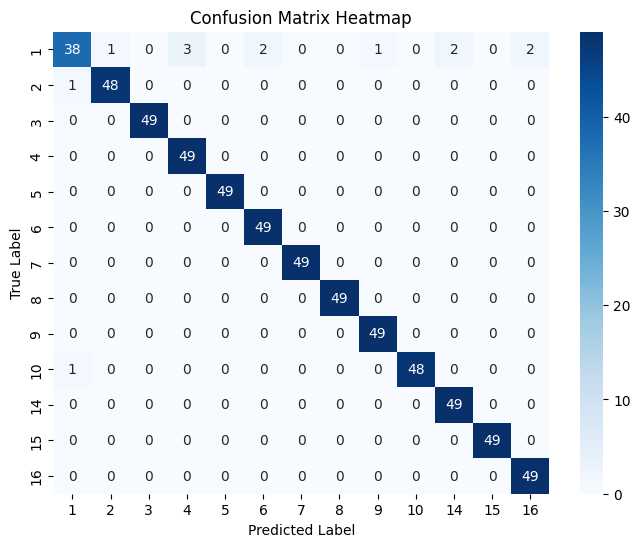

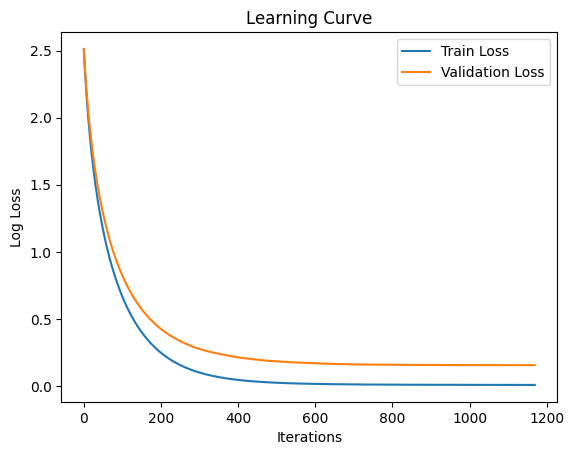

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load data
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Save LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")
print("LabelEncoder saved as label_encoder.pkl")

# Split features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Feature selection with RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=50)
X_selected = rfe.fit_transform(X, y)

# Save selected feature names
selected_features = X.columns[rfe.support_].tolist()
joblib.dump(selected_features, "selected_features.pkl")
print("Selected features saved as selected_features.pkl")
print("Selected features:", selected_features)

# Handle class imbalance with SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Split train set into train and validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define base models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Initialize stacking classifier
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(max_iter=1000)
)

# Fit stacking model
stacked_model.fit(X_train_sub, y_train_sub)

# Save stacking model
joblib.dump(stacked_model, "stacked_model.pkl")
print("Stacking model saved as stacked_model.pkl")

# Transform data to meta-features
X_train_meta = stacked_model.transform(X_train_sub)
X_val_meta = stacked_model.transform(X_val)
X_test_meta = stacked_model.transform(X_test)

# Train XGBoost with early stopping
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    early_stopping_rounds=20,
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=1.0
)

xgb_model.fit(
    X_train_meta, y_train_sub,
    eval_set=[(X_train_meta, y_train_sub), (X_val_meta, y_val)],
    verbose=True
)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_meta)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save XGBoost model
joblib.dump(xgb_model, "trained_model.pkl")
print("XGBoost model saved as trained_model.pkl")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Plot learning curve
results = xgb_model.evals_result()
plt.plot(results["validation_0"]["mlogloss"], label="Train Loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import os
import pandas as pd
import joblib
from uuid import uuid4

def load_ecg_data(mat_file_path, hea_file_path):
    """Load ECG data in physical units (mV)."""
    try:
        record = wfdb.rdrecord(hea_file_path.replace('.hea', ''))
        signals = record.p_signal
        fs = record.fs
        lead_names = record.sig_name
        signals *= 25
        print(f"Signal amplitude range (mV): {np.min(signals):.3f} to {np.max(signals):.3f}")
        print(f"Raw signal samples (lead II, first 10): {signals[:10, 1]}")
        for i, lead in enumerate(lead_names):
            print(f"Lead {lead} amplitude range (mV): {np.min(signals[:, i]):.3f} to {np.max(signals[:, i]):.3f}")
        signals = signals[:2570, :]
        return signals, fs, lead_names
    except Exception as e:
        print(f"Error loading {hea_file_path}: {e}")
        return None, None, None

def detect_qrs(signals, fs):
    """Detect QRS complexes with noise filtering."""
    qrs_locs_all = []
    try:
        from wfdb import processing
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            qrs_locs = processing.xqrs_detect(sig=filtered, fs=fs, verbose=False)
            qrs_locs_all.append(qrs_locs)
    except (ImportError, AttributeError):
        print("wfdb.processing not available, using scipy.signal.find_peaks")
        for lead_signal in signals.T:
            b, a = signal.butter(4, 40, btype='low', fs=fs)
            filtered = signal.filtfilt(b, a, lead_signal)
            b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
            filtered = signal.filtfilt(b, a, filtered)
            peaks, _ = signal.find_peaks(filtered, distance=int(0.6 * fs), prominence=0.05)
            qrs_locs_all.append(peaks)
    print(f"QRS peaks detected in lead II: {len(qrs_locs_all[1])}")
    return qrs_locs_all[1] if len(qrs_locs_all) > 1 else np.array([]), qrs_locs_all

def detect_p_t_waves(lead_signal, qrs_locs, fs):
    """Detect P and T waves with onset/offset detection."""
    b, a = signal.butter(4, [0.5, 40], btype='band', fs=fs)
    filtered = signal.filtfilt(b, a, lead_signal)

    p_peaks, t_peaks = [], []
    window_p = int(0.5 * fs)
    window_t = int(0.8 * fs)
    for qrs in qrs_locs:
        p_start = max(0, qrs - window_p)
        p_segment = filtered[p_start:qrs]
        if len(p_segment) > 10:
            p_peak_idx = p_start + np.argmax(np.abs(p_segment))
            p_diff = np.diff(p_segment)
            p_crossings = np.where(np.diff(np.sign(p_diff)))[0]
            if len(p_crossings) > 0:
                p_peaks.append(p_peak_idx)

        t_end = min(len(filtered), qrs + window_t)
        t_segment = filtered[qrs:t_end]
        if len(t_segment) > 10:
            t_peak_idx = qrs + np.argmax(np.abs(t_segment))
            t_amplitude = filtered[t_peak_idx]
            t_offset = t_peak_idx
            for i in range(t_peak_idx, min(t_end, len(filtered))):
                if abs(filtered[i]) < 0.03 * abs(t_amplitude) or np.abs(np.diff(filtered[max(i-2, 0):i+2])).mean() < 0.0005:
                    t_offset = i
                    break
            if t_offset > t_peak_idx or abs(t_amplitude) > 0.03:
                t_peaks.append(t_peak_idx)
            else:
                print(f"T peak detection failed at QRS {qrs}, amplitude: {t_amplitude:.3f}")

    print(f"P peaks: {len(p_peaks)}, T peaks: {len(t_peaks)}")
    return np.array(p_peaks), np.array(t_peaks)

def compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs):
    """Compute temporal intervals in seconds."""
    if len(qrs_locs) < 2:
        print("Insufficient QRS peaks for interval calculation")
        return None, None, None, None, None
    try:
        qrs_dur = None
        pr_int = np.mean([(qrs_locs[i] - p_peaks[i]) / fs for i in range(min(len(qrs_locs), len(p_peaks))) if qrs_locs[i] > p_peaks[i]]) if len(p_peaks) > 0 else 0
        qt_int = np.mean([(t_peaks[i] - qrs_locs[i]) / fs for i in range(min(len(qrs_locs), len(t_peaks))) if t_peaks[i] > qrs_locs[i]]) if len(t_peaks) > 0 else 0
        qt_int = min(qt_int, 0.44) if qt_int > 0 else qt_int
        p_durations = []
        window_p = int(0.12 * fs)
        for p in p_peaks:
            start = max(0, p - window_p//2)
            end = min(len(lead_signal), p + window_p//2)
            if end > start:
                p_durations.append((end - start) / fs)
        p_int = np.mean(p_durations) if p_durations else 0
        t_durations = []
        window_t = int(0.25 * fs)
        for t in t_peaks:
            start = max(0, t - window_t//2)
            end = min(len(lead_signal), t + window_t//2)
            if end > start:
                t_durations.append((end - start) / fs)
        t_int = np.mean(t_durations) if t_durations else 0
        return qrs_dur, pr_int, qt_int, p_int, t_int
    except Exception as e:
        print(f"Error in interval calculation: {e}")
        return None, None, None, None, None

def compute_heart_rate(qrs_locs, fs):
    """Compute heart rate from RR intervals."""
    if len(qrs_locs) < 2:
        return 0
    try:
        rr_intervals = np.diff(qrs_locs) / fs
        return 60 / np.mean(rr_intervals)
    except:
        return 0

def compute_qrst_angle(signals, qrs_locs, fs, lead_names):
    """Compute QRST angle using leads I and II."""
    try:
        lead_idx = {name: idx for idx, name in enumerate(lead_names)}
        qrs_vec = np.array([
            np.mean([signals[qrs, lead_idx['I']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0,
            np.mean([signals[qrs, lead_idx['II']] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
        ])
        t_peaks, _ = detect_p_t_waves(signals[:, lead_idx['I']], qrs_locs, fs)
        t_vec = np.array([
            np.mean([signals[t, lead_idx['I']] for t in t_peaks]) if len(t_peaks) > 0 else 0,
            np.mean([signals[t, lead_idx['II']] for t in t_peaks]) if len(t_peaks) > 0 else 0
        ])
        angle = np.arccos(np.dot(qrs_vec, t_vec) / (np.linalg.norm(qrs_vec) * np.linalg.norm(t_vec) + 1e-10)) * 180 / np.pi
        return angle
    except:
        return 0

def compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs):
    """Compute wave-specific features."""
    features = {}
    q_peaks, s_peaks, r_prime_peaks = [], [], []
    window = int(0.12 * fs)
    lead_amplitude = np.max(np.abs(lead_signal))
    prominence_r = max(0.002 * lead_amplitude, 0.001)
    for qrs in qrs_locs:
        q_start = max(0, qrs - window)
        q_segment = lead_signal[q_start:qrs]
        if len(q_segment) > 5:
            peaks, props = signal.find_peaks(-q_segment, prominence=0.005)
            if len(peaks) > 0:
                q_peaks.append(q_start + peaks[0])
            else:
                q_peaks.append(max(0, qrs - int(0.05 * fs)))

        s_end = min(len(lead_signal), qrs + window)
        s_segment = lead_signal[qrs:s_end]
        if len(s_segment) > 5:
            peaks, props = signal.find_peaks(-s_segment, prominence=0.005)
            if len(peaks) > 0:
                s_peaks.append(qrs + peaks[0])
            else:
                s_peaks.append(min(len(lead_signal), qrs + int(0.05 * fs)))

        r_end = min(len(lead_signal), qrs + int(0.15 * fs))
        r_segment = lead_signal[qrs:r_end]
        if len(r_segment) > 5:
            peaks, props = signal.find_peaks(r_segment, prominence=prominence_r)
            if len(peaks) > 1:
                r_prime_peaks.append(qrs + peaks[1])
            elif len(peaks) == 1 and props['prominences'][0] > 0.005 * lead_amplitude:
                r_prime_peaks.append(qrs + peaks[0])

    print(f"Q peaks: {len(q_peaks)}, S peaks: {len(s_peaks)}, R' peaks: {len(r_prime_peaks)}")
    qrs_durations = [(s - q) / fs for q, s in zip(q_peaks, s_peaks) if s > q]
    qrs_dur = np.mean(qrs_durations) if qrs_durations else 0.1

    q_wave = np.mean([lead_signal[q] for q in q_peaks]) if len(q_peaks) > 0 else 0
    r_wave = np.mean([lead_signal[qrs] for qrs in qrs_locs]) if len(qrs_locs) > 0 else 0
    s_wave = np.mean([lead_signal[s] for s in s_peaks]) if len(s_peaks) > 0 else 0
    t_wave = np.mean([lead_signal[t] for t in t_peaks]) if len(t_peaks) > 0 else 0
    p_wave = np.mean([lead_signal[p] for p in p_peaks]) if len(p_peaks) > 0 else 0
    r_prime_wave = np.mean([lead_signal[r] for r in r_prime_peaks]) if len(r_prime_peaks) > 0 else r_wave

    jj_peaks = [qrs + int(0.04 * fs) for qrs in qrs_locs]
    jj_wave = np.mean([lead_signal[jj] for jj in jj_peaks if jj < len(lead_signal)]) if len(jj_peaks) > 0 else 0

    qrsa = np.mean([lead_signal[qrs] - lead_signal[q] + lead_signal[s] for qrs, q, s in zip(qrs_locs, q_peaks, s_peaks)]) if len(q_peaks) > 0 and len(s_peaks) > 0 and len(qrs_locs) > 0 else r_wave
    qrsta = qrsa + t_wave if len(t_peaks) > 0 else qrsa

    window_def = int(0.25 * fs)
    num_deflections = 0
    noise_level = np.std(signal.filtfilt(*signal.butter(4, [40, 100], btype='band', fs=fs), lead_signal))
    deflection_threshold = max(0.001, 2 * noise_level)
    for qrs in qrs_locs:
        start = max(0, qrs - window_def//2)
        end = min(len(lead_signal), qrs + window_def//2)
        segment = lead_signal[start:end]
        crossings = np.where(np.diff(np.sign(segment)))[0]
        if len(crossings) > 0:
            amplitudes = np.abs(segment[crossings])
            valid_crossings = crossings[amplitudes > deflection_threshold]
            num_deflections += len(valid_crossings)
    num_deflections = num_deflections / len(qrs_locs) if len(qrs_locs) > 0 else 0

    if r_prime_wave == r_wave and r_wave != 0:
        print(f"Warning: R' wave using R wave ({r_wave:.3f} mV), segment max: {np.max(r_segment):.3f}, min: {np.min(r_segment):.3f}, mean: {np.mean(r_segment):.3f}, prominence: {prominence_r:.3f}")

    return {
        'Q_wave': q_wave,
        'R_wave': r_wave,
        'S_wave': s_wave,
        'T_wave': t_wave,
        'P_wave': p_wave,
        'JJ_wave': jj_wave,
        'QRSA': qrsa,
        'QRSTA': qrsta,
        'Num_intrinsic_deflections': num_deflections,
        'QRS_duration': qrs_dur,
        'R_prime_wave': r_prime_wave
    }

def extract_features(signals, fs, lead_names, feature_list, median_values):
    """Extract specified features, fill missing with medians."""
    features = {}
    if signals is None or fs is None:
        print("No signals or sampling frequency provided")
        return features
    qrs_locs, qrs_locs_all = detect_qrs(signals, fs)

    lead_signal = signals[:, 1]
    p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
    _, pr_int, qt_int, p_int, t_int = compute_intervals(qrs_locs, p_peaks, t_peaks, lead_signal, fs)
    features['P-R_interval'] = pr_int if pr_int is not None else 0
    features['Q-T_interval'] = qt_int if qt_int is not None else 0
    features['P_interval'] = p_int if p_int is not None else 0
    features['T_interval'] = t_int if t_int is not None else 0
    features['Heart_rate'] = compute_heart_rate(qrs_locs, fs)
    features['QRST_angle'] = compute_qrst_angle(signals, qrs_locs, fs, lead_names)

    features['Height'] = np.max(signals[:, 1]) if len(signals) > 0 else 0

    lead_idx = {name: idx for idx, name in enumerate(lead_names)}
    lead_map = {'I': 'DI', 'II': 'DII', 'III': 'DIII', 'aVR': 'AVR', 'aVL': 'AVL', 'aVF': 'AVF', 'V1': 'V1', 'V2': 'V2', 'V3': 'V3', 'V4': 'V4', 'V5': 'V5', 'V6': 'V6'}
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        if lead not in lead_idx:
            print(f"Lead {lead} not found in signal")
            continue
        lead_signal = signals[:, lead_idx[lead]]
        p_peaks, t_peaks = detect_p_t_waves(lead_signal, qrs_locs, fs)
        wave_features = compute_wave_features(lead_signal, qrs_locs, p_peaks, t_peaks, fs)

        prefix = lead_map[lead]
        for feature, value in wave_features.items():
            feature_name = f"{prefix}_{feature}"
            if feature_name in feature_list or feature_name.replace('_wave', '_wave_1') in feature_list:
                features[feature_name] = value
        if f"{prefix}_R'_wave" in feature_list:
            features[f"{prefix}_R'_wave"] = wave_features['R_prime_wave']
        if f"{prefix}_R'_wave_1" in feature_list:
            features[f"{prefix}_R'_wave_1"] = wave_features['R_prime_wave']
        if f"{prefix}_Q_wave_1" in feature_list:
            features[f"{prefix}_Q_wave_1"] = wave_features['Q_wave']
        if f"{prefix}_S_wave_1" in feature_list:
            features[f"{prefix}_S_wave_1"] = wave_features['S_wave']
        if lead == 'II':
            features['QRS_duration'] = wave_features['QRS_duration']
        if not wave_features['T_wave']:
            print(f"No T wave detected in lead {lead}")

    # Fill missing features with training medians
    for feature in feature_list:
        if feature not in features:
            features[feature] = median_values.get(feature, 0)
            print(f"Warning: Feature {feature} missing, filled with median {median_values.get(feature, 0)}")

    return features

def load_models_and_artifacts(stacked_model_path, xgb_model_path, label_encoder_path, selected_features_path, training_csv_path):
    """Load models and artifacts."""
    try:
        stacked_model = joblib.load(stacked_model_path)
        print(f"Stacked model loaded from {stacked_model_path}")
    except Exception as e:
        print(f"Error loading stacked model: {e}")
        return None, None, None, None, None

    try:
        xgb_model = joblib.load(xgb_model_path)
        print(f"XGBoost model loaded from {xgb_model_path}")
    except Exception as e:
        print(f"Error loading XGBoost model: {e}")
        return None, None, None, None, None

    try:
        label_encoder = joblib.load(label_encoder_path)
        print(f"Label encoder loaded from {label_encoder_path}")
    except Exception as e:
        print(f"Error loading label encoder: {e}")
        return None, None, None, None, None

    try:
        selected_features = joblib.load(selected_features_path)
        print(f"Selected features loaded from {selected_features_path}")
        print(f"Selected features: {selected_features}")
    except Exception as e:
        print(f"Error loading selected features: {e}")
        return None, None, None, None, None

    try:
        df = pd.read_csv(training_csv_path)
        median_values = df.drop(columns=["Class"]).median().to_dict()
        print(f"Training medians loaded from {training_csv_path}")
    except Exception as e:
        print(f"Error loading training CSV: {e}")
        median_values = {}

    return stacked_model, xgb_model, label_encoder, selected_features, median_values

def predict_ecg(stacked_model, xgb_model, label_encoder, features, feature_list):
    """Predict using the stacked and XGBoost models."""
    try:
        # Prepare feature vector in the order of feature_list
        feature_vector = np.array([features.get(f, 0) for f in feature_list]).reshape(1, -1)
        print(f"Raw feature vector shape: {feature_vector.shape}")

        # Transform to meta-features
        meta_features = stacked_model.transform(feature_vector)
        print(f"Meta-features shape: {meta_features.shape}")

        # Predict with XGBoost
        prediction = xgb_model.predict(meta_features)

        # Decode prediction
        decoded_prediction = label_encoder.inverse_transform(prediction)[0]
        return decoded_prediction
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

def process_ecg_files(data_dir, stacked_model_path, xgb_model_path, label_encoder_path, selected_features_path, training_csv_path):
    """Process ECG files, extract features, and predict."""
    stacked_model, xgb_model, label_encoder, feature_list, median_values = load_models_and_artifacts(
        stacked_model_path, xgb_model_path, label_encoder_path, selected_features_path, training_csv_path
    )

    if any(x is None for x in [stacked_model, xgb_model, label_encoder, feature_list]):
        print("Failed to load models or artifacts, exiting")
        return []

    all_results = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            hea_file = os.path.join(data_dir, file)
            mat_file = hea_file.replace('.hea', '.mat')
            if not os.path.exists(mat_file):
                print(f"Missing .mat file for {hea_file}")
                continue
            signals, fs, lead_names = load_ecg_data(mat_file, hea_file)
            if signals is None:
                continue
            features = extract_features(signals, fs, lead_names, feature_list, median_values)
            if not features:
                print(f"No features extracted for {file}")
                continue
            features['file'] = file
            prediction = predict_ecg(stacked_model, xgb_model, label_encoder, features, feature_list)
            if prediction is not None:
                features['prediction'] = prediction
                all_results.append(features)
                print(f"File: {file}, Prediction: {prediction}")
            else:
                print(f"Prediction failed for {file}")

    return all_results

if __name__ == "__main__":
    # Install dependencies
    # !pip install --upgrade wfdb scipy numpy pandas joblib

    # Specify paths
    data_dir = '/content'  # Update to your ECG data directory
    stacked_model_path = '/content/stacked_model.pkl'
    xgb_model_path = '/content/trained_model.pkl'
    label_encoder_path = '/content/label_encoder.pkl'
    selected_features_path = '/content/selected_features.pkl'
    training_csv_path = '/content/ecg_data/arrhythmia.csv'

    # Process files and predict
    results = process_ecg_files(
        data_dir, stacked_model_path, xgb_model_path, label_encoder_path, selected_features_path, training_csv_path
    )

    if results:
        # Save results to CSV
        df = pd.DataFrame(results)
        output_csv = '/content/ecg_predictions.csv'
        df.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")

        # Print detailed results
        for result in results:
            print(f"\nFile: {result['file']}")
            print(f"Prediction: {result['prediction']}")
            for feature in feature_list:
                value = result.get(feature, 0)
                print(f"{feature}: {value}")
                if feature in ['QRS_duration', 'P-R_interval', 'Q-T_interval', 'P_interval', 'T_interval'] and value > 0:
                    expected_ranges = {
                        'QRS_duration': (0.06, 0.12),
                        'P-R_interval': (0.12, 0.20),
                        'Q-T_interval': (0.30, 0.44),
                        'P_interval': (0.08, 0.12),
                        'T_interval': (0.10, 0.25)
                    }
                    min_val, max_val = expected_ranges[feature]
                    if value < min_val or value > max_val:
                        print(f"Warning: {feature} value {value} is outside expected range [{min_val}, {max_val}]")
                elif feature.endswith('_wave') and abs(value) > 5:
                    print(f"Warning: {feature} amplitude {value} is unusually large (expected < 5 mV)")
    else:
        print("No valid ECG files processed or predictions made")

Stacked model loaded from /content/stacked_model.pkl
XGBoost model loaded from /content/trained_model.pkl
Label encoder loaded from /content/label_encoder.pkl
Selected features loaded from /content/selected_features.pkl
Selected features: ['Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_13', 'Feature_15', 'Feature_76', 'Feature_90', 'Feature_91', 'Feature_93', 'Feature_112', 'Feature_113', 'Feature_114', 'Feature_117', 'Feature_167', 'Feature_168', 'Feature_169', 'Feature_171', 'Feature_177', 'Feature_179', 'Feature_181', 'Feature_197', 'Feature_207', 'Feature_211', 'Feature_224', 'Feature_226', 'Feature_228', 'Feature_230', 'Feature_233', 'Feature_234', 'Feature_237', 'Feature_238', 'Feature_239', 'Feature_240', 'Feature_242', 'Feature_243', 'Feature_247', 'Feature_248', 'Feature_249', 'Feature_250', 'Feature_252', 'Feature_257', 'Feature_259', 'Feature_260', 'Feature_267', 'Feature_270', 'Feature_277', 'Feature_279']
Training medians loaded from

Leads: ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Sampling rate: 257 Hz


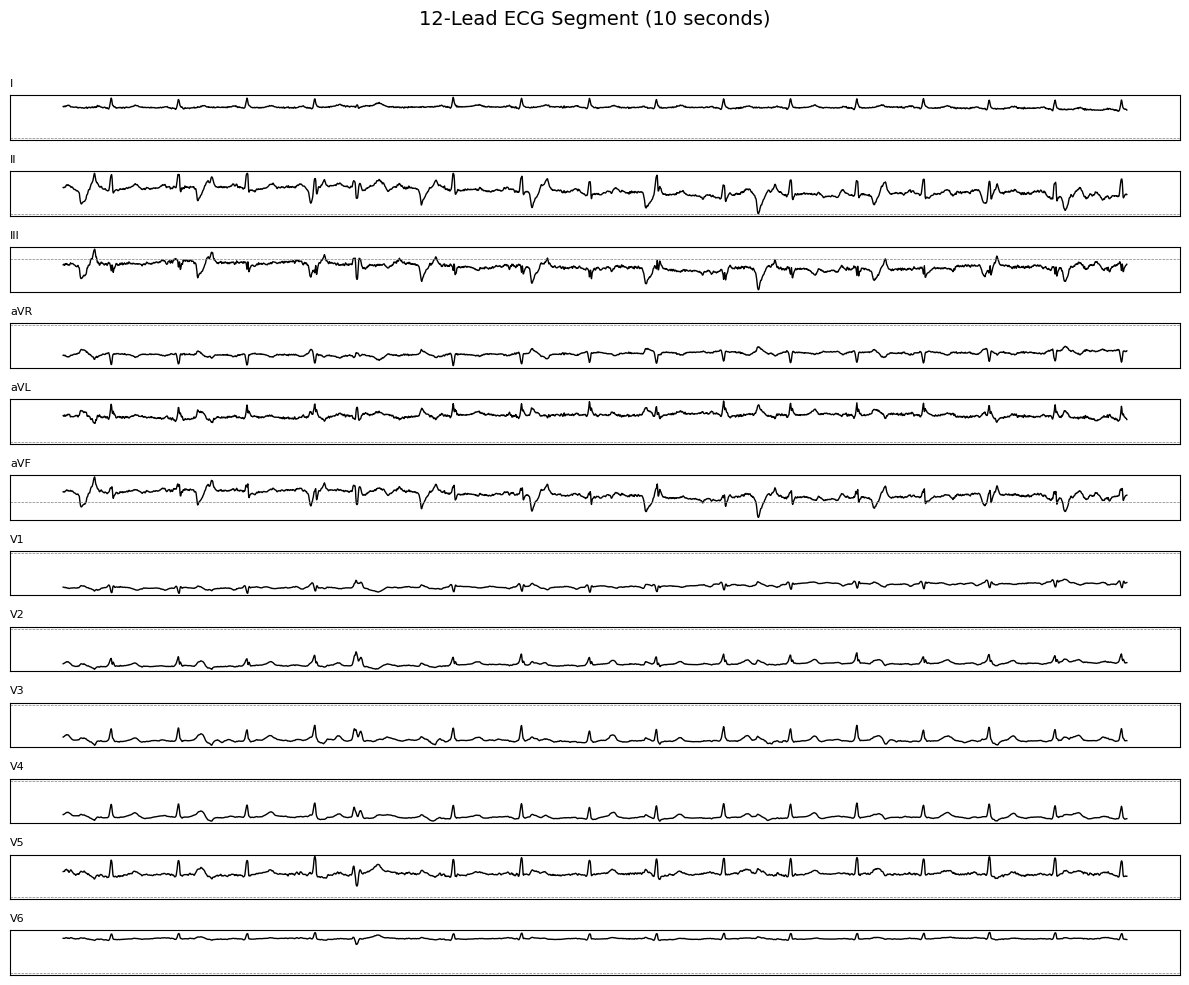

In [ ]:
import wfdb
import matplotlib.pyplot as plt

# Replace with your file path (without extension)
record_path = "/content/I0001"  # e.g., "ecg_data/record_001"

# Read the record
record = wfdb.rdrecord(record_path)

# Get signal data and metadata
signals = record.p_signal         # shape: (n_samples, n_leads)
lead_names = record.sig_name      # e.g., ['I', 'II', 'III', ..., 'V6']
fs = record.fs                    # sampling frequency

# Optional: print available info
print(f"Leads: {lead_names}")
print(f"Sampling rate: {fs} Hz")

# Choose duration and extract signal window (e.g., 10 seconds)
duration = 10  # seconds
start = 0
end = int(fs * duration)
segment = signals[start:end, :]

# Plot the 12-lead ECG
plt.figure(figsize=(12, 10))
for i, lead in enumerate(lead_names):
    plt.subplot(len(lead_names), 1, i + 1)
    plt.plot(segment[:, i], color='black', linewidth=1)
    plt.title(lead, fontsize=8, loc='left')
    plt.xticks([])
    plt.yticks([])
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

plt.suptitle("12-Lead ECG Segment (10 seconds)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
pip install wfdb biosppy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.7 MB/s eta 0:00:00


In [ ]:
!pip install peakutils


In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 15.7 MB/s eta 0:00:00


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

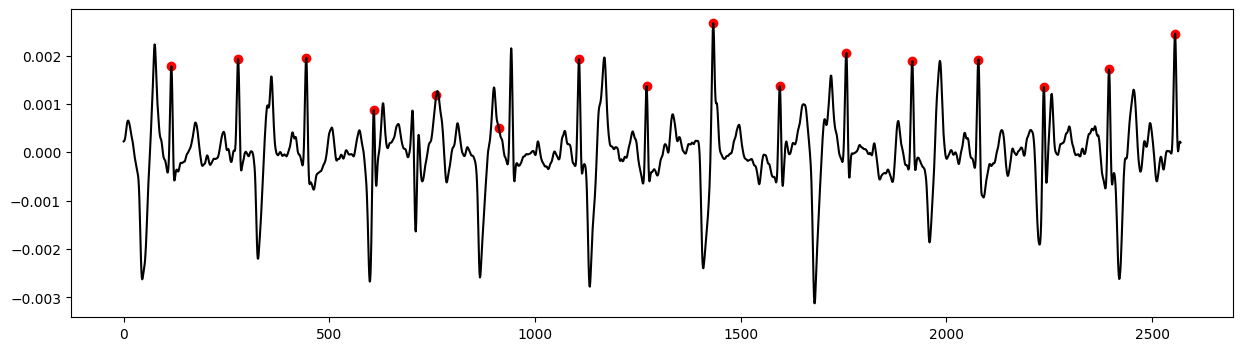

In [ ]:
import wfdb
import neurokit2 as nk
import matplotlib.pyplot as plt

# Load ECG record
record_path = "/content/I0001"  # don't include .mat/.hea
record = wfdb.rdrecord(record_path)
fs = record.fs
signals = record.p_signal
lead_names = record.sig_name

# Select lead
lead_index = lead_names.index("II") if "II" in lead_names else 0
ecg_raw = signals[:fs * 10, lead_index]  # 10 seconds

# Process ECG
ecg_cleaned = nk.ecg_clean(ecg_raw, sampling_rate=fs)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=fs)

# Extract wave features
rpeaks = info["ECG_R_Peaks"]
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]

# Plot manually with annotations
plt.figure(figsize=(15, 4))
plt.plot(ecg_cleaned, label="ECG Signal", color='black')
plt.scatter(rpeaks, ecg_cleaned[rpeaks], color='red', label='R-peaks')
plt.scatter(p_peaks, ecg_cleaned[p_peaks], color='blue', label='P-peaks')
plt.scatter(t_peaks, ecg_cleaned[t_peaks], color='green', label='T-peaks')

plt.title("ECG Signal with Annotated R, P, and T Peaks")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()



✅ Accuracy: 0.8132
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.98      0.91        49
           2       0.70      0.78      0.74         9
           3       0.50      1.00      0.67         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         3
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       0.75      0.90      0.82        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.81        91
   macro avg       0.48      0.48      0.46        91
weighted avg       0.74      0.81      0.76        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


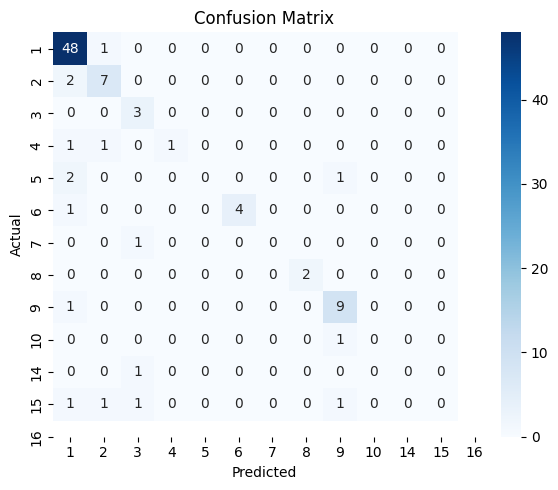

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Step 1: Load the dataset
df = pd.read_csv('/content/ecg_data/arrhythmia.csv')

# Step 2: Prepare features and labels
X = df.drop(columns=['label', 'patient_id'], errors='ignore')  # drop non-feature columns
y = df['Class']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Predictions and evaluation
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/ecg_data/arrhythmia.csv')
X = df.drop(columns=['target', 'patient_id'], errors='ignore')  # change target if needed
y = df['Class']




imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Impute missing values with mean
from sklearn.impute import SimpleImputer



def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5,
        train_sizes = np.linspace(0.1, 1.0, 10)
, scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', label="CV Score")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


    # Define class labels, excluding 11, 12, 13
    class_labels = [
       "01 - Normal",
    "02 - Ischemic changes (CAD)",
    "03 - Old Anterior MI",
    "04 - Old Inferior MI",
    "05 - Sinus tachycardia",
    "06 - Sinus bradycardia",
    "07 - Ventricular Premature Contraction (PVC)",
    "08 - Supraventricular Premature Contraction",
    "09 - Left bundle branch block",
    "10 - Right bundle branch block",

    "15 - Atrial Fibrillation/Flutter",
    "16 - Others"
    ]

    # Plot confusion matrix with class names
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    plot_learning_curve(model, f"{name} - Learning Curve")



📌 Random Forest
✅ Accuracy: 0.8462
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        49
           2       0.80      0.89      0.84         9
           3       0.50      1.00      0.67         3
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         3
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       0.75      0.90      0.82        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.85        91
   macro avg       0.50      0.52      0.50        91
weighted avg       0.77      0.85      0.80        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


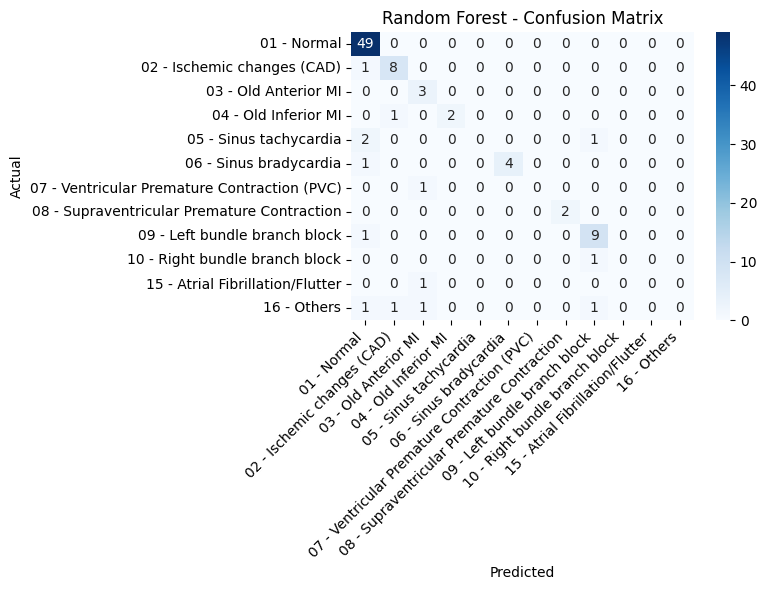

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


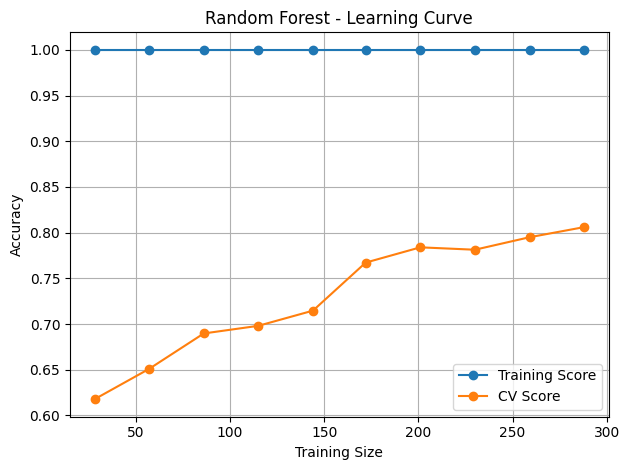

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate(rf_model, "Random Forest")



📌 Support Vector Machine
✅ Accuracy: 0.6154
              precision    recall  f1-score   support

           1       0.58      1.00      0.74        49
           2       0.00      0.00      0.00         9
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       1.00      0.20      0.33        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.62        91
   macro avg       0.30      0.27      0.26        91
weighted avg       0.48      0.62      0.49        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


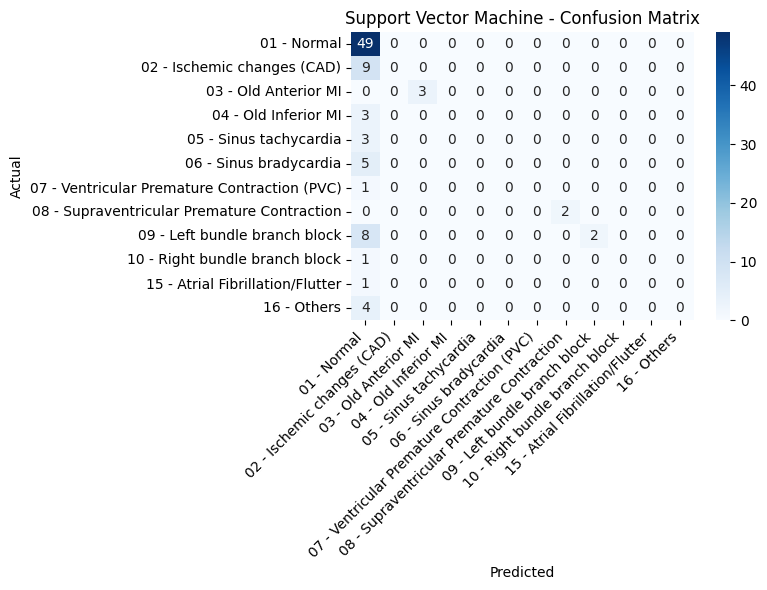

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


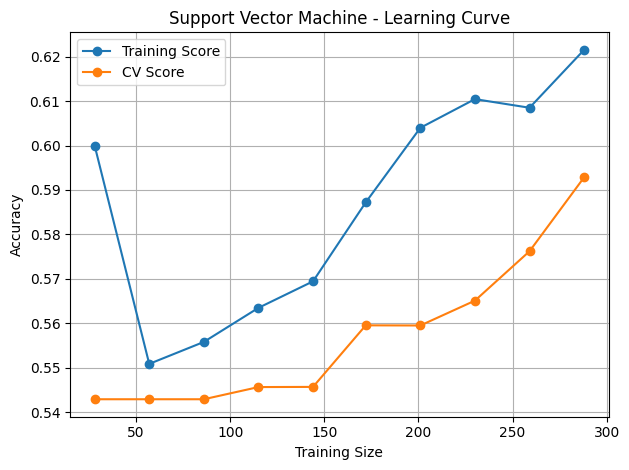

In [18]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=False, random_state=42)
evaluate(svm_model, "Support Vector Machine")



📌 Logistic Regression
✅ Accuracy: 0.6813
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        49
           2       0.55      0.67      0.60         9
           3       0.75      1.00      0.86         3
           4       0.00      0.00      0.00         3
           5       0.25      0.33      0.29         3
           6       0.29      0.40      0.33         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       0.71      0.50      0.59        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.20      0.25      0.22         4

    accuracy                           0.68        91
   macro avg       0.38      0.42      0.40        91
weighted avg       0.67      0.68      0.67        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


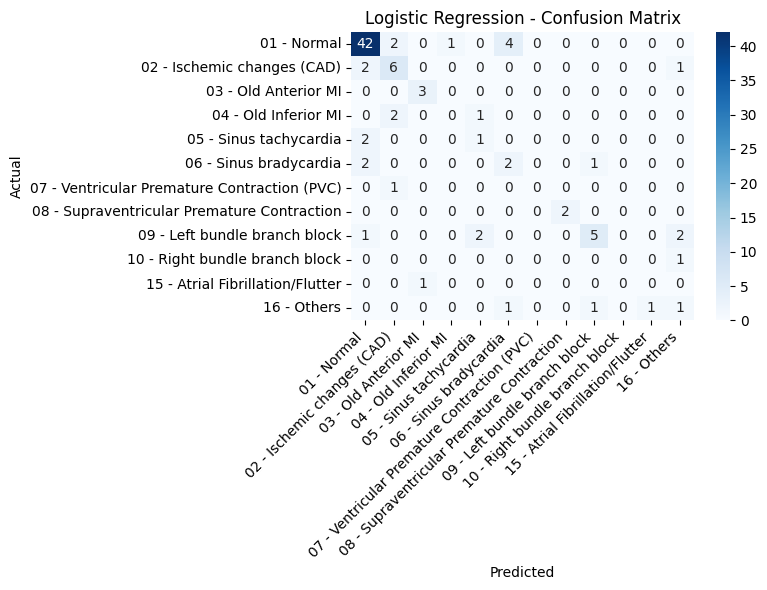

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


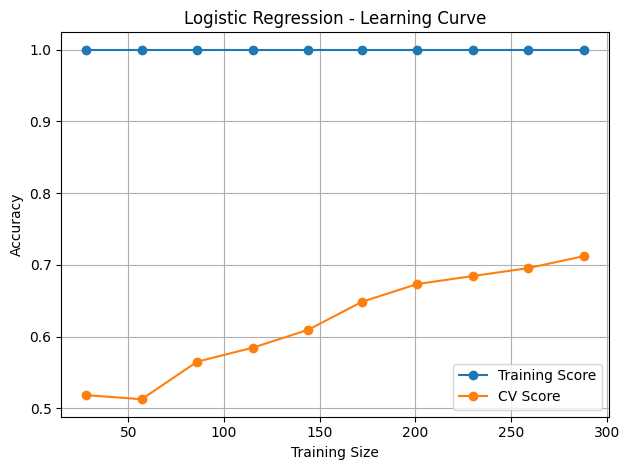

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate(lr_model, "Logistic Regression")


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use this encoded version in train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:57:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost
✅ Accuracy: 0.9451
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      1.00      1.00         9
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       0.91      1.00      0.95        10
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         4

    accuracy                           0.95        91
   macro avg       0.71      0.69      0.68        91
weighted avg       0.92      0.95      0.93        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


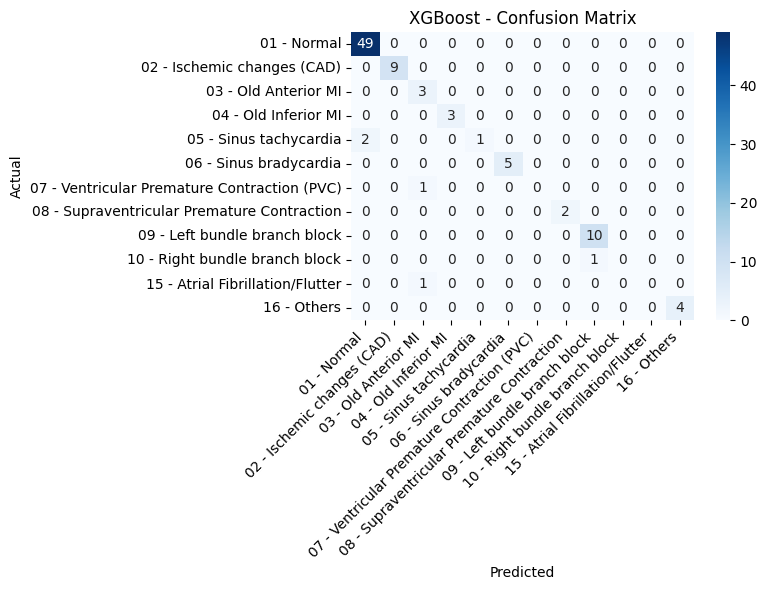

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:57:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:57:44] WARNING: /workspace/src/learner.cc:738: 
Para

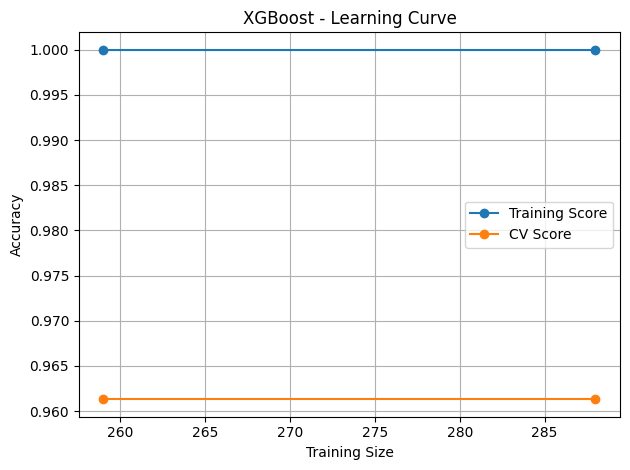

In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
evaluate(xgb_model, "XGBoost")


LabelEncoder saved as label_encoder.pkl
Selected features saved as selected_features.pkl
Selected features: ['Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_13', 'Feature_15', 'Feature_76', 'Feature_90', 'Feature_91', 'Feature_93', 'Feature_112', 'Feature_113', 'Feature_114', 'Feature_117', 'Feature_167', 'Feature_168', 'Feature_169', 'Feature_171', 'Feature_177', 'Feature_179', 'Feature_181', 'Feature_197', 'Feature_207', 'Feature_211', 'Feature_224', 'Feature_226', 'Feature_228', 'Feature_230', 'Feature_233', 'Feature_234', 'Feature_237', 'Feature_238', 'Feature_239', 'Feature_240', 'Feature_242', 'Feature_243', 'Feature_247', 'Feature_248', 'Feature_249', 'Feature_250', 'Feature_252', 'Feature_257', 'Feature_259', 'Feature_260', 'Feature_267', 'Feature_270', 'Feature_277', 'Feature_279']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking model saved as stacked_model.pkl
[0]	validation_0-mlogloss:2.50542	validation_1-mlogloss:2.51229
[1]	validation_0-mlogloss:2.44943	validation_1-mlogloss:2.46170
[2]	validation_0-mlogloss:2.39603	validation_1-mlogloss:2.41157
[3]	validation_0-mlogloss:2.34688	validation_1-mlogloss:2.36536
[4]	validation_0-mlogloss:2.29882	validation_1-mlogloss:2.32011
[5]	validation_0-mlogloss:2.25267	validation_1-mlogloss:2.27839
[6]	validation_0-mlogloss:2.20851	validation_1-mlogloss:2.23785
[7]	validation_0-mlogloss:2.16609	validation_1-mlogloss:2.19986
[8]	validation_0-mlogloss:2.12539	validation_1-mlogloss:2.16325
[9]	validation_0-mlogloss:2.08683	validation_1-mlogloss:2.12851
[10]	validation_0-mlogloss:2.04955	validation_1-mlogloss:2.09510
[11]	validation_0-mlogloss:2.01339	validation_1-mlogloss:2.06281
[12]	validation_0-mlogloss:1.97939	validation_1-mlogloss:2.03209
[13]	validation_0-mlogloss:1.94549	validation_1-mlogloss:2.00199
[14]	validation_0-mlogloss:1.91355	validation_1-mlogloss:1

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [15:34:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[17]	validation_0-mlogloss:1.82175	validation_1-mlogloss:1.88945
[18]	validation_0-mlogloss:1.79318	validation_1-mlogloss:1.86392
[19]	validation_0-mlogloss:1.76523	validation_1-mlogloss:1.83881
[20]	validation_0-mlogloss:1.73852	validation_1-mlogloss:1.81374
[21]	validation_0-mlogloss:1.71208	validation_1-mlogloss:1.78972
[22]	validation_0-mlogloss:1.68676	validation_1-mlogloss:1.76504
[23]	validation_0-mlogloss:1.66163	validation_1-mlogloss:1.74299
[24]	validation_0-mlogloss:1.63717	validation_1-mlogloss:1.72114
[25]	validation_0-mlogloss:1.61348	validation_1-mlogloss:1.69832
[26]	validation_0-mlogloss:1.59050	validation_1-mlogloss:1.67721
[27]	validation_0-mlogloss:1.56788	validation_1-mlogloss:1.65637
[28]	validation_0-mlogloss:1.54570	validation_1-mlogloss:1.63613
[29]	validation_0-mlogloss:1.52406	validation_1-mlogloss:1.61681
[30]	validation_0-mlogloss:1.50290	validation_1-mlogloss:1.59801
[31]	validation_0-mlogloss:1.48256	validation_1-mlogloss:1.57864
[32]	validation_0-mloglos

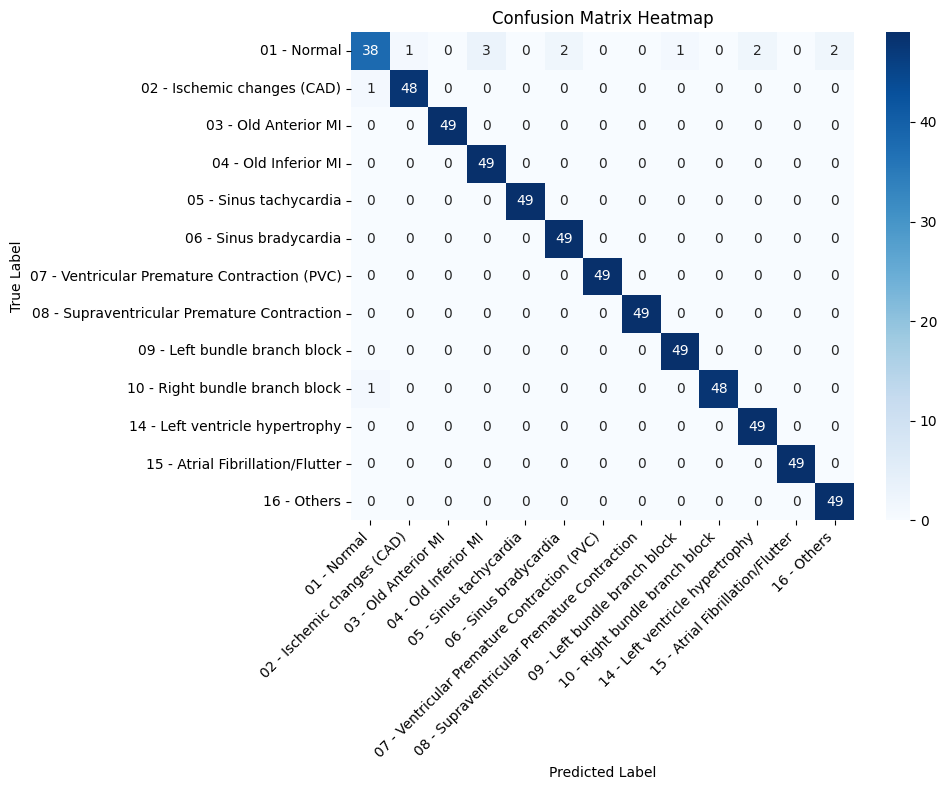

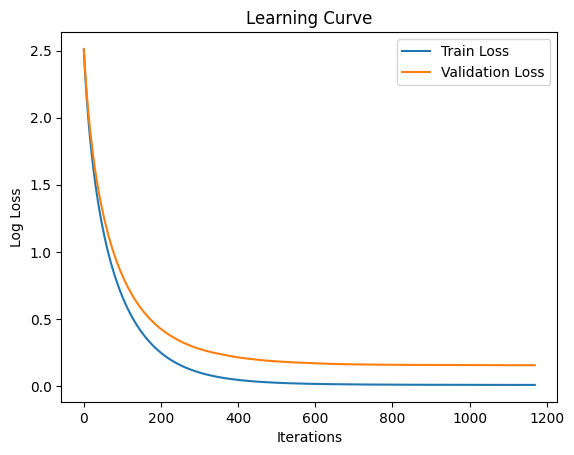

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load data
csv_file = "ecg_data/arrhythmia.csv"
df = pd.read_csv(csv_file)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Save LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")
print("LabelEncoder saved as label_encoder.pkl")

# Split features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Feature selection with RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=50)
X_selected = rfe.fit_transform(X, y)

# Save selected feature names
selected_features = X.columns[rfe.support_].tolist()
joblib.dump(selected_features, "selected_features.pkl")
print("Selected features saved as selected_features.pkl")
print("Selected features:", selected_features)

# Handle class imbalance with SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Split train set into train and validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define base models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True)),
    ("lr", LogisticRegression(max_iter=1000))
]

# Initialize stacking classifier
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(max_iter=1000)
)

# Fit stacking model
stacked_model.fit(X_train_sub, y_train_sub)

# Save stacking model
joblib.dump(stacked_model, "stacked_model.pkl")
print("Stacking model saved as stacked_model.pkl")

# Transform data to meta-features
X_train_meta = stacked_model.transform(X_train_sub)
X_val_meta = stacked_model.transform(X_val)
X_test_meta = stacked_model.transform(X_test)

# Train XGBoost with early stopping
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    early_stopping_rounds=20,
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=1.0
)

xgb_model.fit(
    X_train_meta, y_train_sub,
    eval_set=[(X_train_meta, y_train_sub), (X_val_meta, y_val)],
    verbose=True
)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_meta)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save XGBoost model
joblib.dump(xgb_model, "trained_model.pkl")
print("XGBoost model saved as trained_model.pkl")

# Define class labels with their descriptions
class_labels = [
    "01 - Normal",
    "02 - Ischemic changes (CAD)",
    "03 - Old Anterior MI",
    "04 - Old Inferior MI",
    "05 - Sinus tachycardia",
    "06 - Sinus bradycardia",
    "07 - Ventricular Premature Contraction (PVC)",
    "08 - Supraventricular Premature Contraction",
    "09 - Left bundle branch block",
    "10 - Right bundle branch block",
    "14 - Left ventricle hypertrophy",
    "15 - Atrial Fibrillation/Flutter",
    "16 - Others"
]

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot learning curve
results = xgb_model.evals_result()
plt.plot(results["validation_0"]["mlogloss"], label="Train Loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

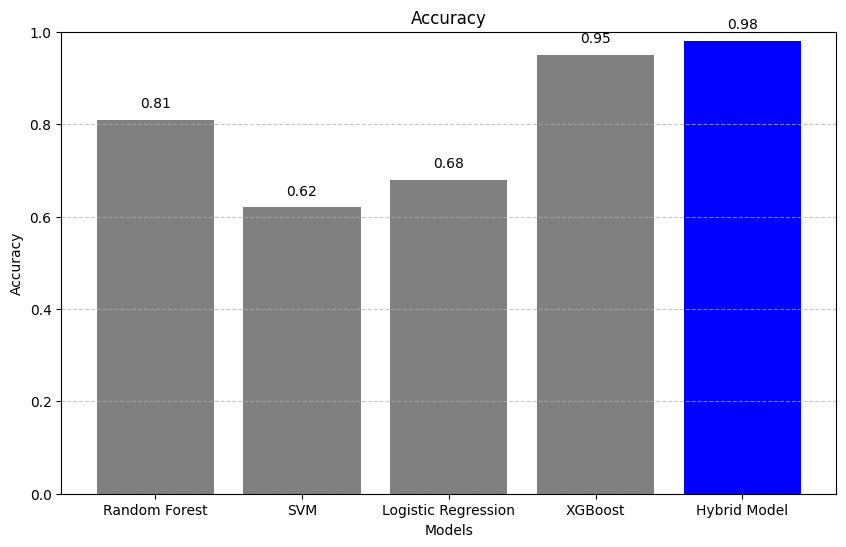

In [23]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Hybrid Model']
accuracies = [0.81, 0.62, 0.68, 0.95, 0.98]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['gray', 'gray', 'gray', 'gray', 'blue'])

# Customize the plot
plt.ylim(0, 1.0)
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(v), ha='center', va='bottom')

# Display the plot
plt.show()